In [3]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

In [4]:
output_folder = "C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/jsuresh_heterogeneous_biting_comparison/output/"

In [3]:
df_uniform = pd.read_csv(output_folder + "ReportEventRecorder_uniform.csv")
df_exp = pd.read_csv(output_folder + "ReportEventRecorder_exponential.csv")
df_lognormal = pd.read_csv(output_folder + "ReportEventRecorder_lognormal.csv")

FileNotFoundError: File b'C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/jsuresh_heterogeneous_biting_comparison/output/ReportEventRecorder_uniform.csv' does not exist

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.scatter(df_uniform["Age"]/365, df_uniform["RelativeBitingRate"], label="Uniform", s=10)
plt.scatter(df_exp["Age"]/365, df_exp["RelativeBitingRate"], label="Exponential", s=2)
plt.scatter(df_lognormal["Age"]/365, df_lognormal["RelativeBitingRate"], label="Log-normal", s=2)
plt.xlabel("Age (years)")
plt.ylabel("Relative biting risk")

plt.yscale("log")

plt.legend()


OK, let's restrict ourselves to only adults to make things clearer

In [ ]:
# df_uniform = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_uniform.csv")
df_exp = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_exponential.csv")
df_lognormal = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_lognormal.csv")

In [ ]:
# Normalize by average biting risk (not 1 for lognormal!!):
df_exp["RelativeBitingRate"] = df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"])
df_lognormal["RelativeBitingRate"] = df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"])

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

# plt.scatter(df_uniform["Age"]/365, df_uniform["RelativeBitingRate"], label="Uniform", s=10)
plt.hist(np.log10(df_exp["RelativeBitingRate"]), label="Exponential", bins=20, histtype='step', lw=3)
plt.hist(np.log10(df_lognormal["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3)
# plt.scatter(df_lognormal["Age"]/365, df_lognormal["RelativeBitingRate"], label="Log-normal", s=2)
plt.xlabel("Log10(Biting risk relative to population mean)")
plt.axvline(0, linestyle='dashed', color='gray')

plt.legend()

What is the Pareto fraction?  Calculate risk of top 20 percent, as ratio of all risk

In [ ]:
def pareto_fraction(z, highest_risk_percentile=20):
#     x = np.sort(np.array(df["RelativeBitingRate"]))
    x = np.sort(z)

    index_to_start = np.int(np.round((100-highest_risk_percentile)/100*len(x)))
    x_high_risk = x[index_to_start:]
    
    print("Highest risk group starts at ", x[index_to_start])
#     print(index_to_start/len(df))
    
    return np.sum(x_high_risk)/np.sum(x)

In [ ]:
print(pareto_fraction(df_exp, highest_risk_percentile=50))
print(pareto_fraction(df_lognormal, highest_risk_percentile=50))

In [ ]:
print(pareto_fraction(df_exp, highest_risk_percentile=20))
print(pareto_fraction(df_lognormal, highest_risk_percentile=20))

In [ ]:
print(pareto_fraction(df_exp, highest_risk_percentile=10))
print(pareto_fraction(df_lognormal, highest_risk_percentile=10))

## 2021-01-12

Can exponential have different Pareto fractions?

In [ ]:
plt.hist(df_exp["RelativeBitingRate"], density=True,bins=30)
xp = np.linspace(0,10,100)
plt.plot(xp,np.exp(-xp))

In [ ]:

def x0(lam=1):
    return -(1/lam) * np.log(0.2)

In [ ]:
x0(1)

In [ ]:
# Exponential: highest 20% will _always_ contribute ~52% of bites.

In [ ]:
plt.figure(figsize=(5,5), dpi=300)
plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]),bins=np.linspace(0,50,150), histtype='step', label="exponential", lw=1)
plt.hist(df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"]),bins=np.linspace(0,50,150), label="lognormal", lw=1)

plt.legend()
plt.xlim(0,30)

plt.yscale("log")
plt.xlabel("Biting risk relative to population mean")


In [ ]:
np.max(df_exp["RelativeBitingRate"])

In [ ]:
np.mean(df_exp["RelativeBitingRate"])

In [ ]:
np.mean(df_lognormal["RelativeBitingRate"])

In [ ]:
np.sum(df_lognormal["RelativeBitingRate"] > 100*3.763)

In [ ]:
np.sum(df_lognormal["RelativeBitingRate"] > 10*3.763)

In [ ]:
np.sum(df_lognormal["RelativeBitingRate"])

In [ ]:
30/113062

In [ ]:
(450/113062)*1000

In [ ]:
np.sum(df_exp["RelativeBitingRate"])/30

In [ ]:
a = np.sort(np.array(df_lognormal["RelativeBitingRate"]))[::-1]/3.763489

In [ ]:
a[:500]

In [ ]:
500/30

In [ ]:
np.sum(a>10)/np.sum(a)

Gaussian might also fit the bill?

In [ ]:
df_gaussian = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_gaussian_sigma1.csv")
    

In [ ]:
plt.figure(dpi=300)
plt.hist(df_gaussian["RelativeBitingRate"], bins=30)
plt.xlabel("Relative Biting Risk")

In [ ]:
np.sum(df_gaussian["RelativeBitingRate"] ==0)

In [ ]:
len(df_gaussian)

In [ ]:
4290/30042

In [ ]:
xl = np.array(df_lognormal["RelativeBitingRate"])
xe = np.array(df_exp["RelativeBitingRate"])
print(np.sum(xl[np.logical_and(xl > 5, xl <10)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 5, xe <10)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 0, xl <0.1)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 0, xe <0.1)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 0.1, xl <0.5)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 0.1, xe <0.5)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 0.5, xl <1)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 0.5, xe <1)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 1, xl <3)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 1, xe <3)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 3, xl <10)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 3, xe <10)])/np.sum(xe))

In [ ]:
print(np.sum(xl[np.logical_and(xl > 10, xl <1000)])/np.sum(xl))
print(np.sum(xe[np.logical_and(xe > 10, xe <1000)])/np.sum(xe))

In [ ]:
np.var(xl)

In [ ]:
np.mean(xe)

In [ ]:
np.var(xe)

In [ ]:
sns.violinplot(xe)
# sns.violinplot(xl)

In [ ]:
sns.violinplot(xl[xl<10])

In [ ]:
sns.violinplot(xe[xe<10], color="C1")

In [11]:
df_raw = pd.read_csv("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/jsuresh_heterogeneous_biting_comparison/cooper19_data/Uganda_data.csv")

Jinja
121
Kanungu
306
Tororo
1011


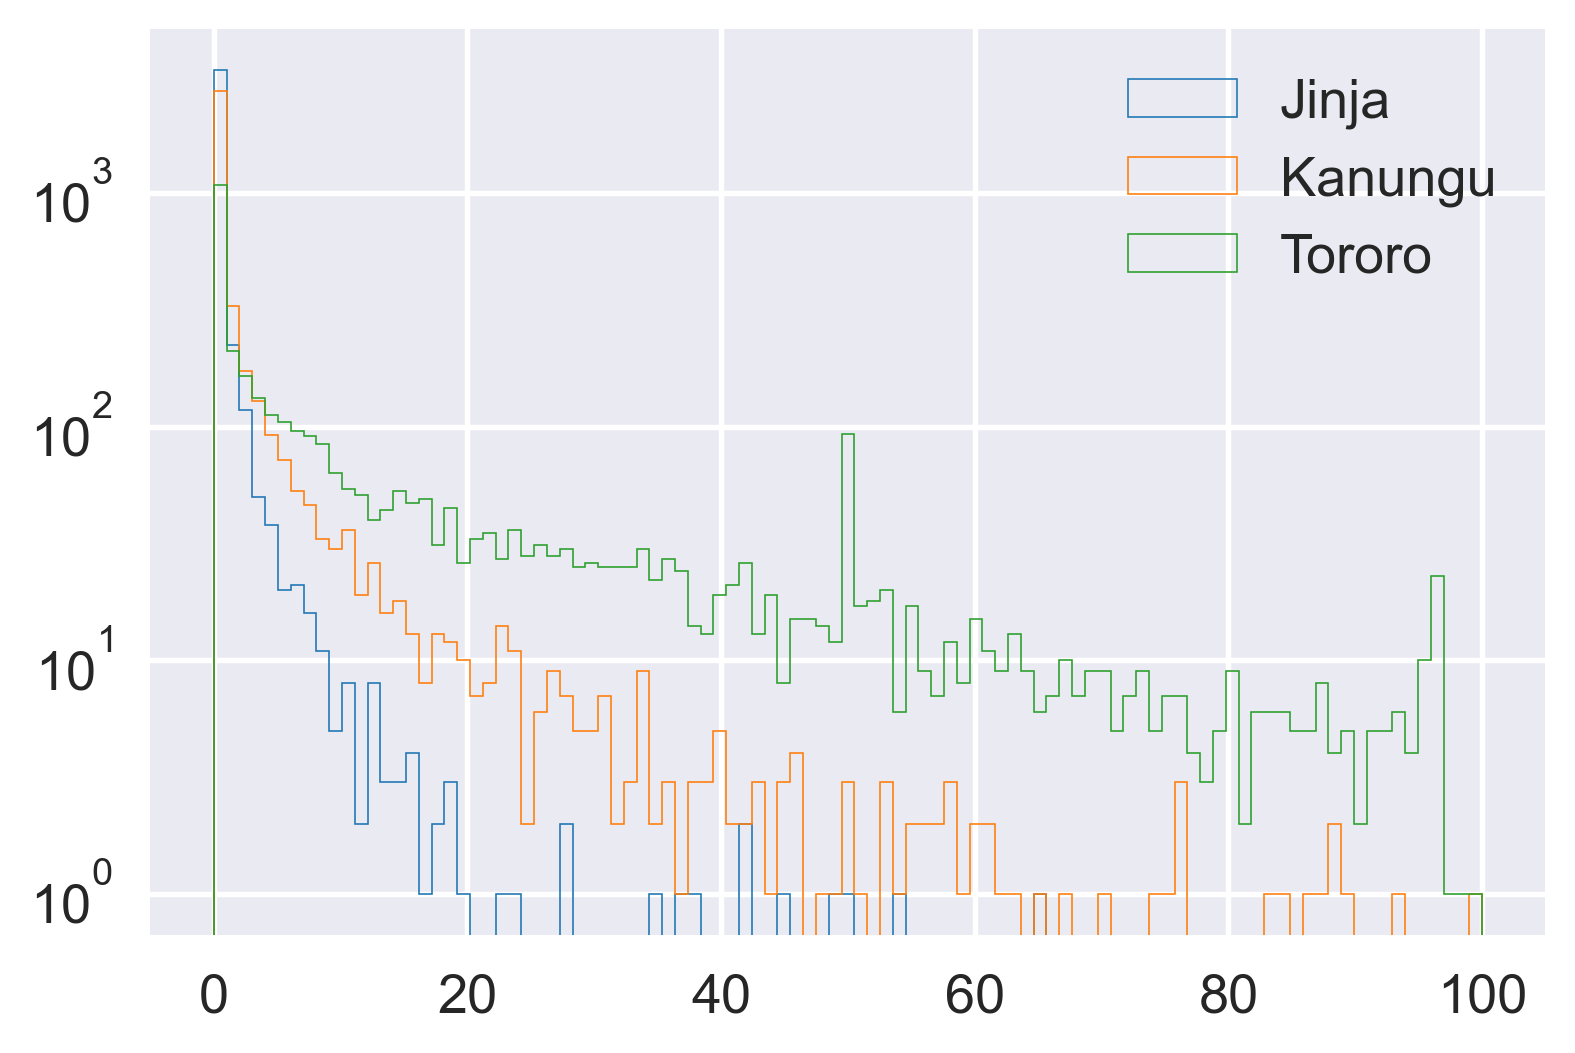

In [12]:
plt.figure(dpi=300)
for site, sdf in df_raw.groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles"]))
    plt.hist(sdf["totalanopheles"], bins=np.linspace(0,100,100), label=site, histtype="step")
plt.yscale("log")

# plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]),bins=np.linspace(0,50,150), histtype='step', label="exponential", lw=1)
# plt.hist(df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"]),bins=np.linspace(0,50,150), label="lognormal", lw=1)

plt.legend()

Jinja
14
Kanungu
28
Tororo
115


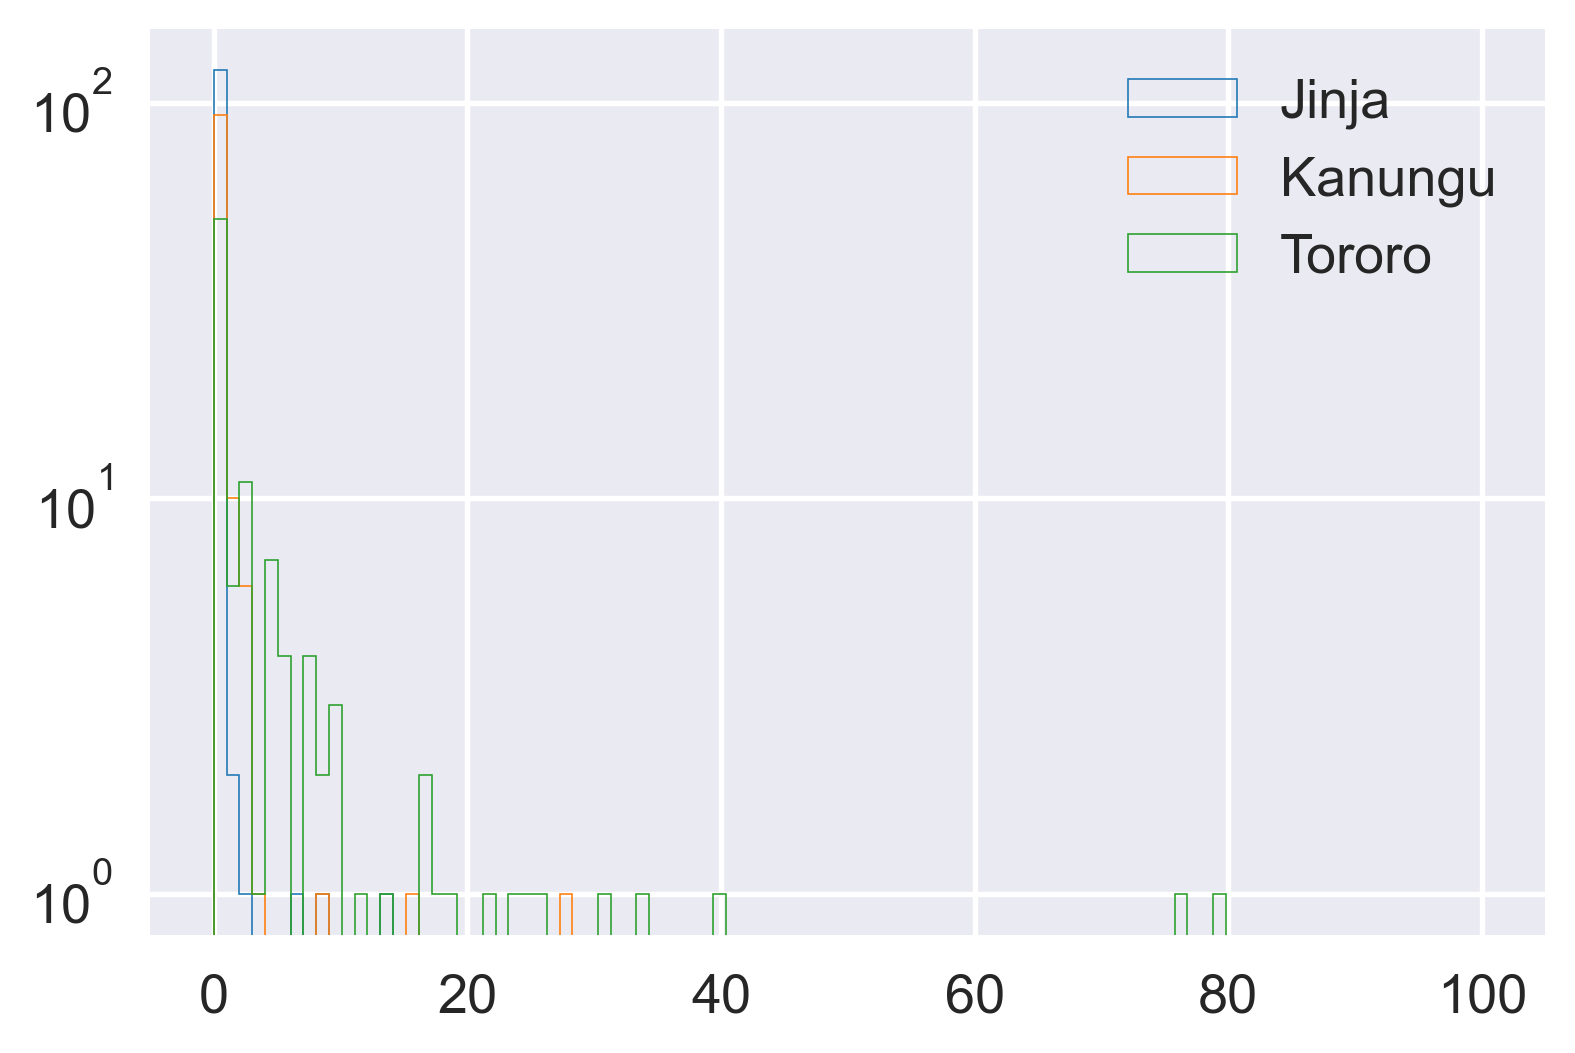

In [13]:
plt.figure(dpi=300)

start_day = 500
time_cut = np.logical_and(df_raw["studyDay"] >= start_day, df_raw["studyDay"] <= start_day + 30)
for site, sdf in df_raw[time_cut].groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles"]))
    plt.hist(sdf["totalanopheles"], bins=np.linspace(0,100,100), label=site, histtype="step")
plt.yscale("log")

# plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]),bins=np.linspace(0,50,150), histtype='step', label="exponential", lw=1)
# plt.hist(df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"]),bins=np.linspace(0,50,150), label="lognormal", lw=1)

plt.legend()

In [16]:
df_raw["month"] = -1
for m in range(1000):
    start_day = 30*m
    end_day = 30*(m+1)
    df_raw.loc[np.logical_and(df_raw["studyDay"] >= start_day, df_raw["studyDay"] < end_day), "month"] = m

In [17]:
month_agg = df_raw.groupby(["siteid","month"]).agg("mean").reset_index()[["month", "siteid","totalanopheles"]]

In [18]:
plt.hist(foo["totalanopheles"])

NameError: name 'foo' is not defined

Text(0, 0.5, 'average anophelines caught')

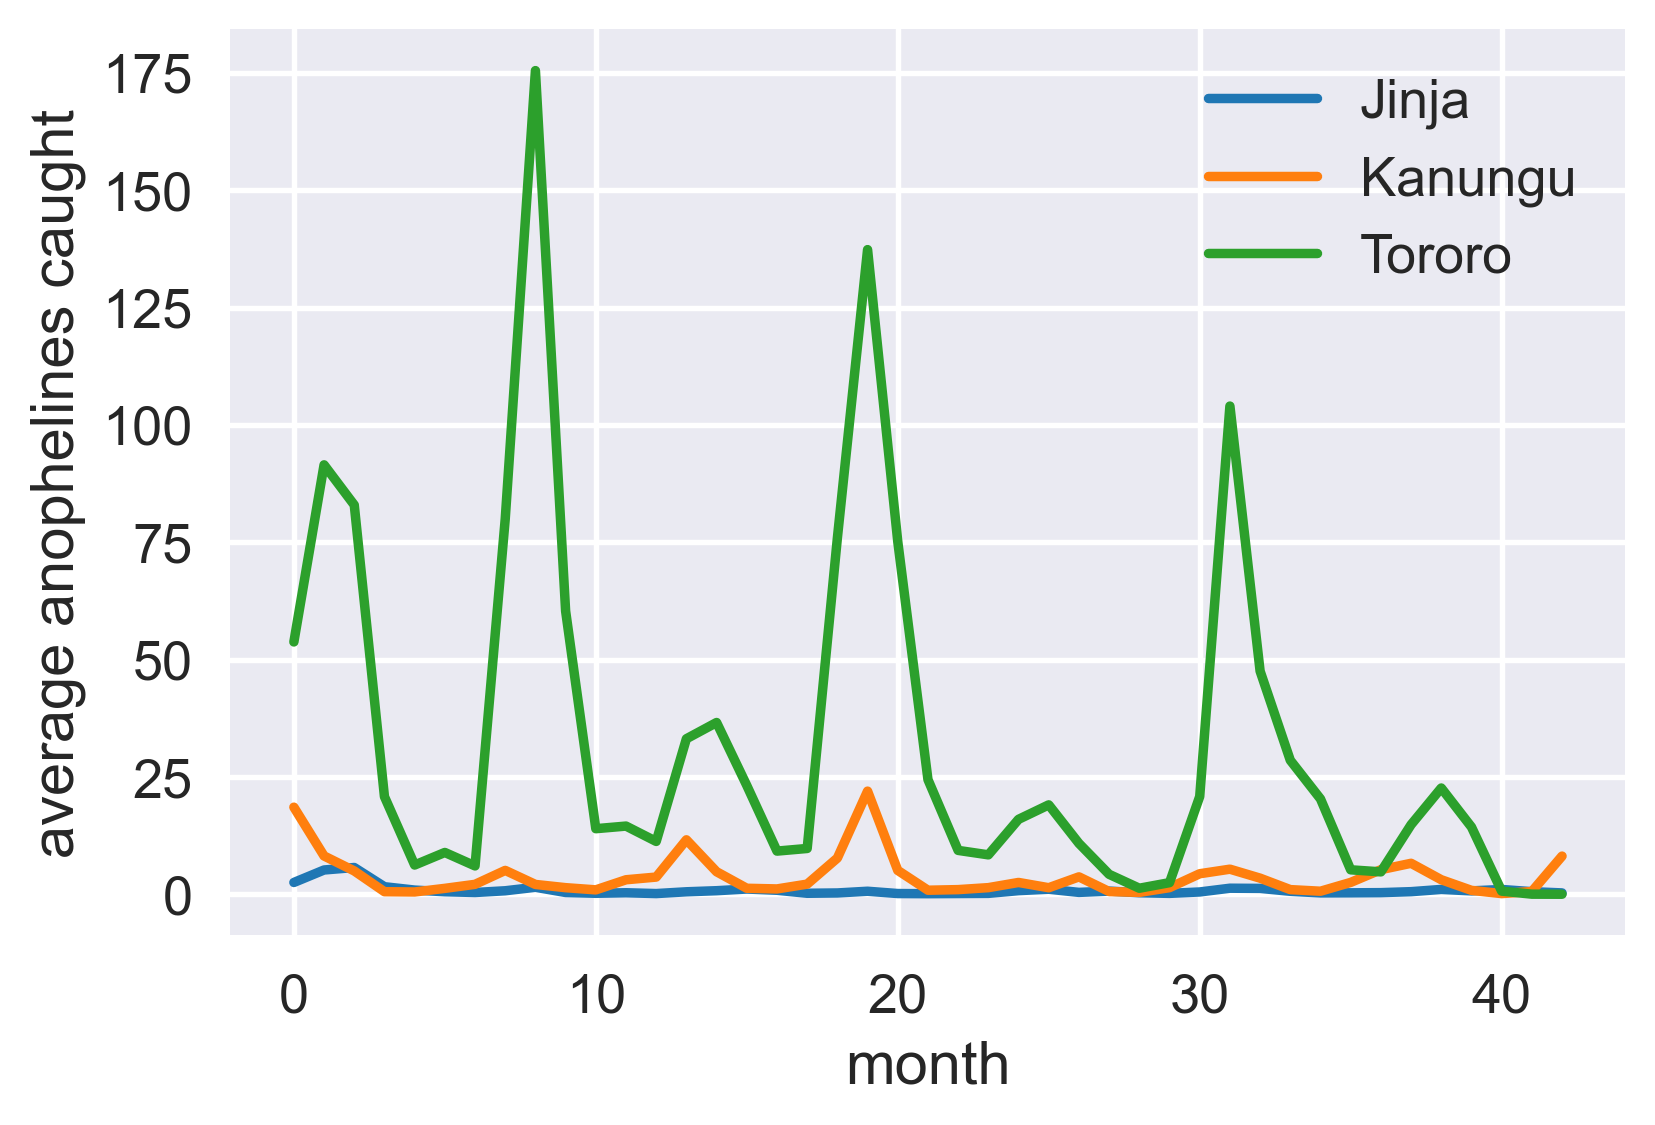

In [364]:
plt.figure(dpi=300)
for site, sdf in month_agg.groupby("siteid"):
    plt.plot(sdf["month"], sdf["totalanopheles"], label=site)
    
plt.legend()
plt.xlabel("month")
plt.ylabel("average anophelines caught")

In [20]:
df_raw_with_mean = df_raw.merge(month_agg.rename(columns={"totalanopheles": "month_avg_anopheles"}), on=["month", "siteid"], how="left")

In [21]:
df_raw_with_mean["totalanopheles_normalized_to_mean"] = df_raw_with_mean["totalanopheles"]/df_raw_with_mean["month_avg_anopheles"]

Jinja
36.57142857142857
Kanungu
56.852459016393446
Tororo
62.0


NameError: name 'df_lognormal' is not defined

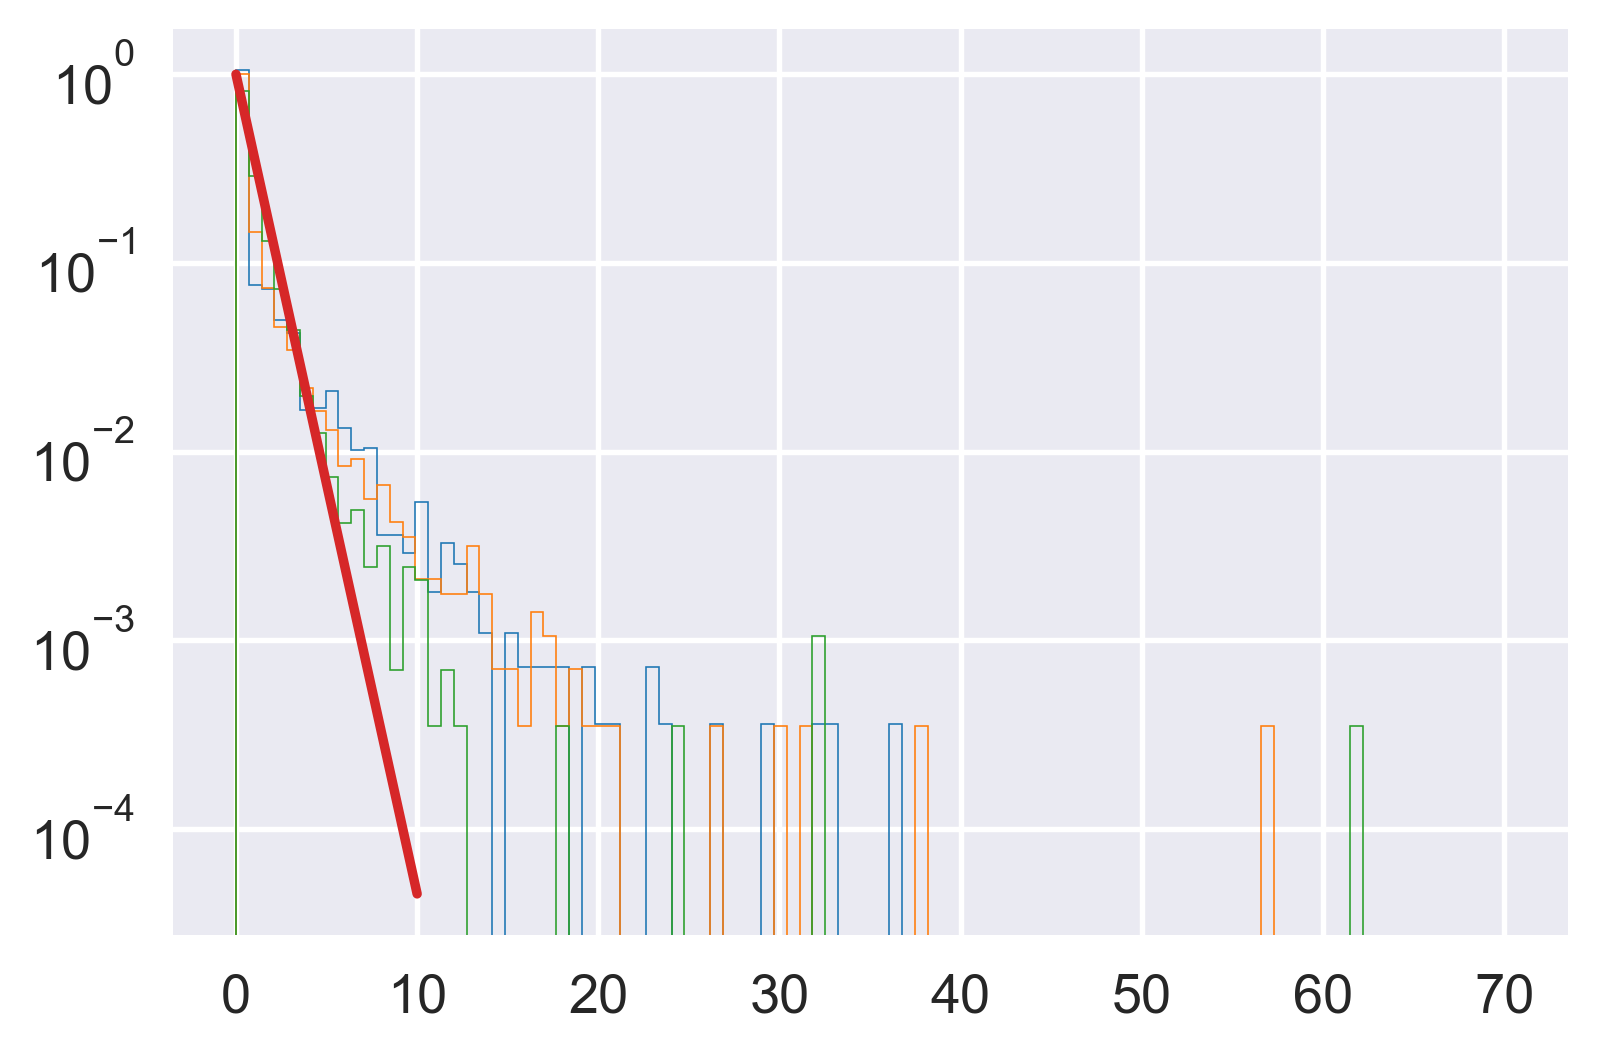

In [22]:
plt.figure(dpi=300)
for site, sdf in df_raw_with_mean.groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles_normalized_to_mean"]))
    plt.hist(sdf["totalanopheles_normalized_to_mean"], density=True, bins=np.linspace(0,70,100), label=site, histtype="step")
plt.yscale("log")
# plt.xscale("log")

xp = np.linspace(0,10,100)
plt.plot(xp,np.exp(-xp))

    
# plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]),bins=np.linspace(0,50,150), density=True, histtype='step', label="exponential", lw=1)
plt.hist(df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"]),bins=np.linspace(0,50,150), density=True, label="lognormal", lw=1)

plt.legend()

In [74]:
df_raw_with_mean

,totalanopheles,studyDay,hhid,siteid,month,month_avg_anopheles,totalanopheles_normalized_to_mean
0,19,3,101009801,Tororo,0,53.760870,0.353417
1,62,32,101009801,Tororo,1,91.490741,0.677664
2,24,62,101009801,Tororo,2,82.940000,0.289366
3,35,100,101009801,Tororo,3,20.810127,1.681873
4,1,124,101009801,Tororo,4,6.240000,0.160256
5,4,180,101009801,Tororo,6,6.050420,0.661111
6,1,188,101009801,Tororo,6,6.050420,0.165278
7,6,215,101009801,Tororo,7,79.968750,0.075029
8,12,247,101009801,Tororo,8,175.483516,0.068382
9,29,275,101009801,Tororo,9,60.351852,0.480515


NameError: name 'df_lognormal' is not defined

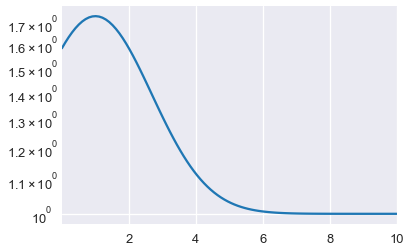

In [23]:
def gaussian(x, center, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) *np.exp(-0.5*((x-center)/sigma)**2)
def lognormal(x, center_in_log_space=1, sigma=1.68):
#     gaussian = 1/(sigma*np.sqrt(2*np.pi)) *np.exp(-0.5*((x-center_in_log_space)/sigma)**2)
    g = gaussian(x, center_in_log_space, sigma)
#     return np.exp(g)
    return 10.** g

xp = np.linspace(0,10,100)
plt.plot(xp,lognormal(xp))
plt.yscale("log")
plt.xlim([1e-5,10])

plt.hist(df_lognormal["RelativeBitingRate"],density=True, bins=np.linspace(0,50,150), label="lognormal", lw=1)


In [24]:
def gaussian(x, center, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) *np.exp(-0.5*((x-center)/sigma)**2)

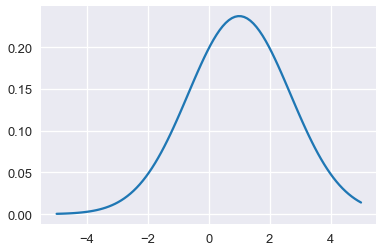

In [25]:
xp = np.linspace(-5,5,100)
plt.plot(xp,gaussian(xp,1,1.68))

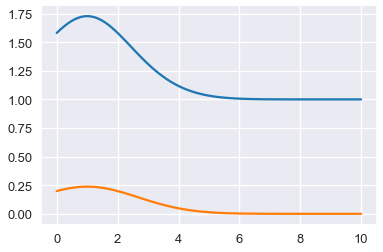

In [26]:
xp = np.linspace(0,10,100)
yg = gaussian(xp,1,1.68)
yl = lognormal(xp,1,1.68)
plt.plot(xp,yl)
plt.plot(xp,yg)

In [ ]:
10.** yg
# Not just 10**previous function, but 10**(xi), where xi is a random variable that has that distribution

In [ ]:
# Not

In [ ]:
import scipy

In [ ]:
scipy?

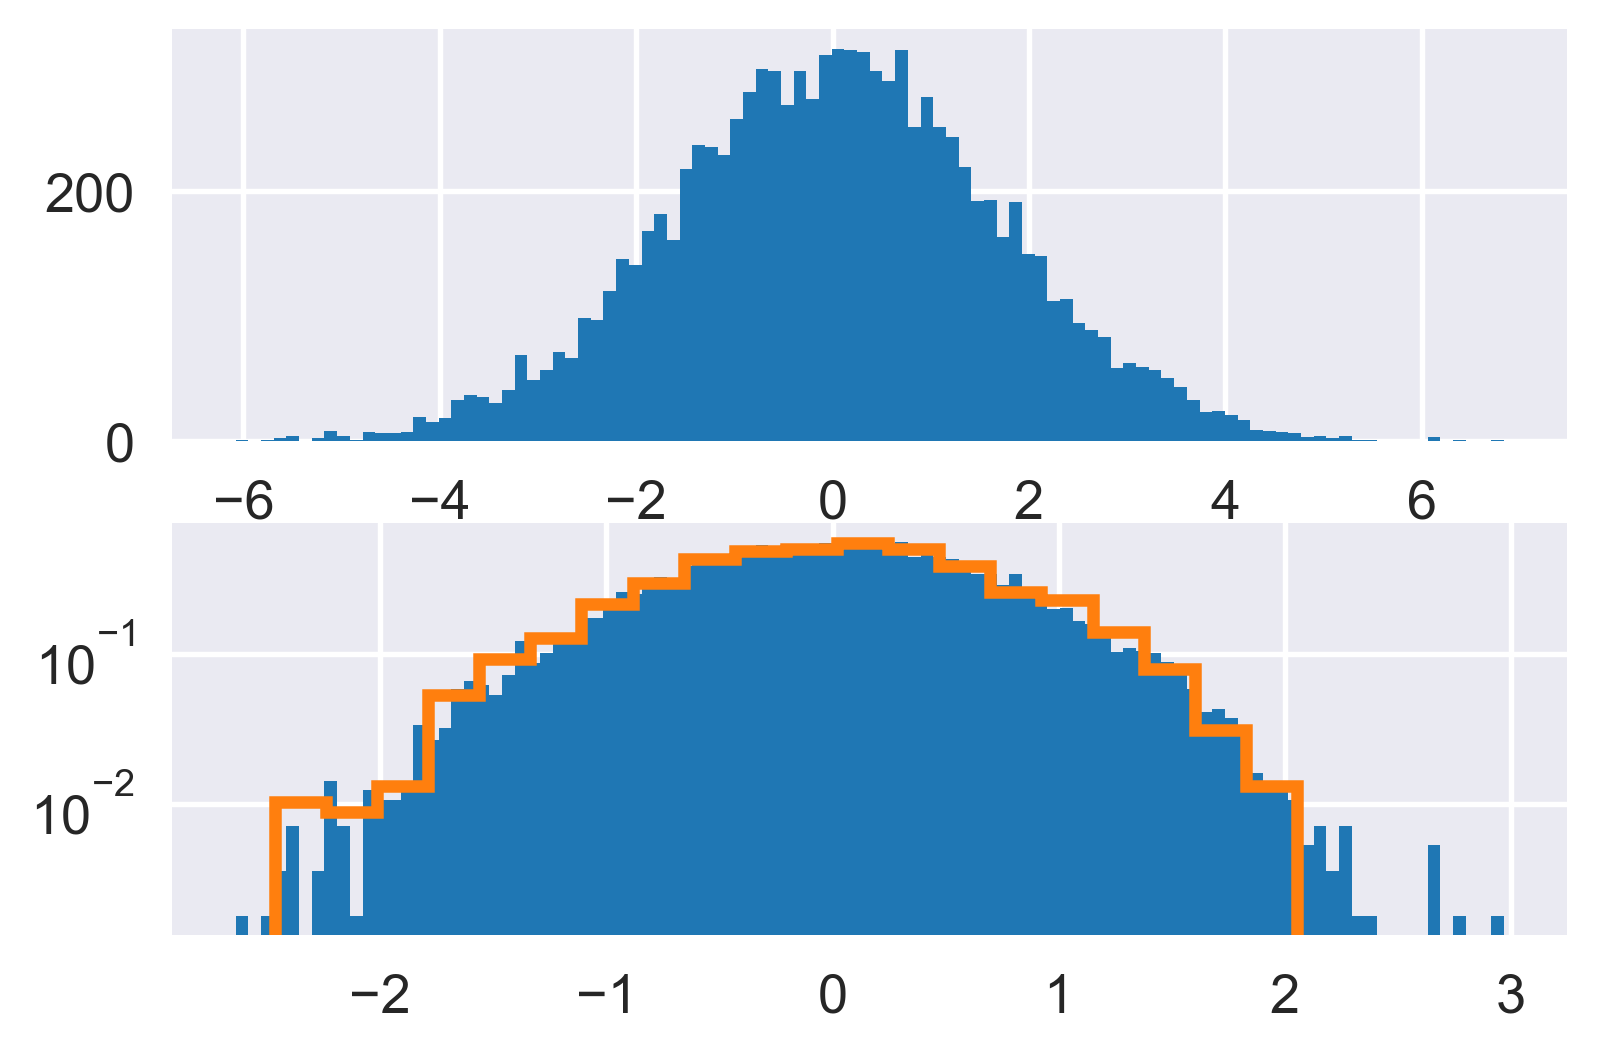

In [29]:
plt.figure(dpi=300)

yg = np.random.normal(0,scale=1.68,size=10000)
yl = np.exp(yg)

plt.subplot(211)
plt.hist(yg, bins=100)
plt.subplot(212)
plt.hist(np.log10(yl), bins=100, density=True)
plt.hist(np.log10(df_lognormal_v2["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)
plt.yscale("log")

In [136]:
from numpy.random import exponential

def return_lognormal(sigma, size=10000, center=0, rescale_to_mean=True):
    yg = np.random.normal(center,scale=sigma,size=size)
    yl = np.exp(yg)
    if rescale_to_mean:
        return yl/np.mean(yl)
    else:
        return yl
    
def return_exponential(size=10000, rescale_to_mean=True):
    x = exponential(size=size)
    
    if rescale_to_mean:
        return x/np.mean(x)
    else:
        return x

In [120]:
x=return_lognormal(1.6, center=0, rescale_to_mean=True)
z = return_exponential()

Text(0.5, 0, 'Risk compared to population mean')

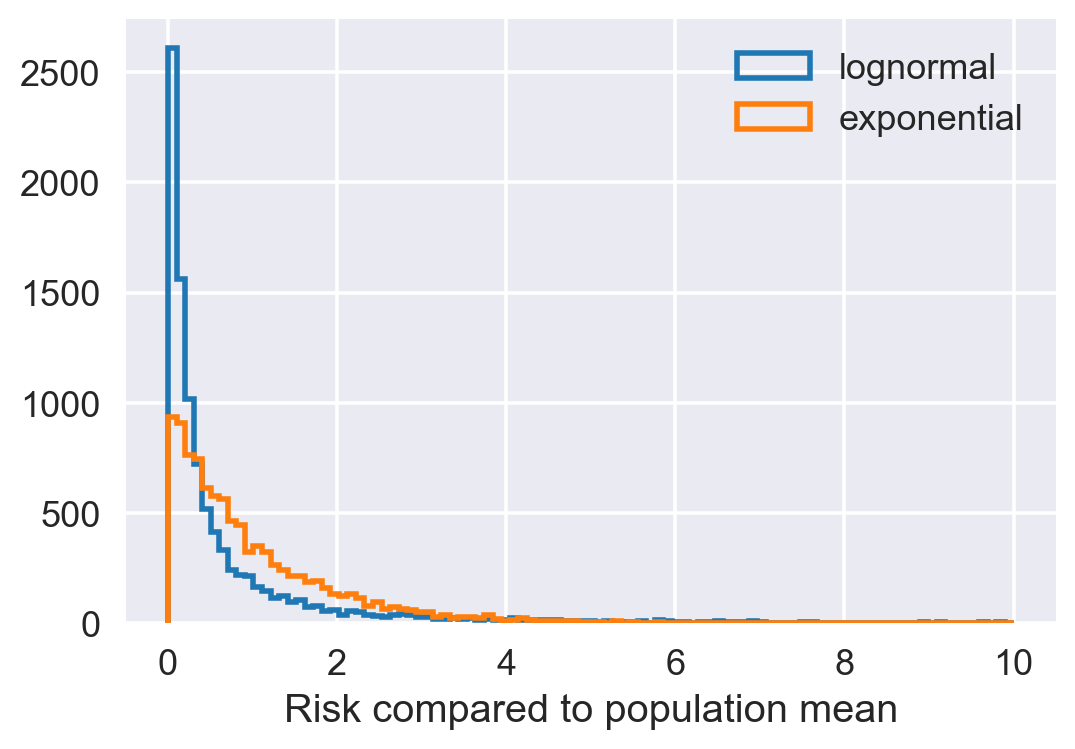

In [121]:
plt.figure(dpi=200)
plt.hist(x, bins=np.linspace(0,10,100), histtype="step", lw=2, label="lognormal")
plt.hist(z, bins=np.linspace(0,10,100), histtype="step", lw=2, label="exponential")

# plt.axvline(np.mean(x), c="C0", linestyle='dashed')
# plt.axvline(np.mean(z), c="C1", linestyle='dashed')

plt.legend()

plt.xlabel("Risk compared to population mean")

Text(0.5, 0, 'Risk compared to population mean')

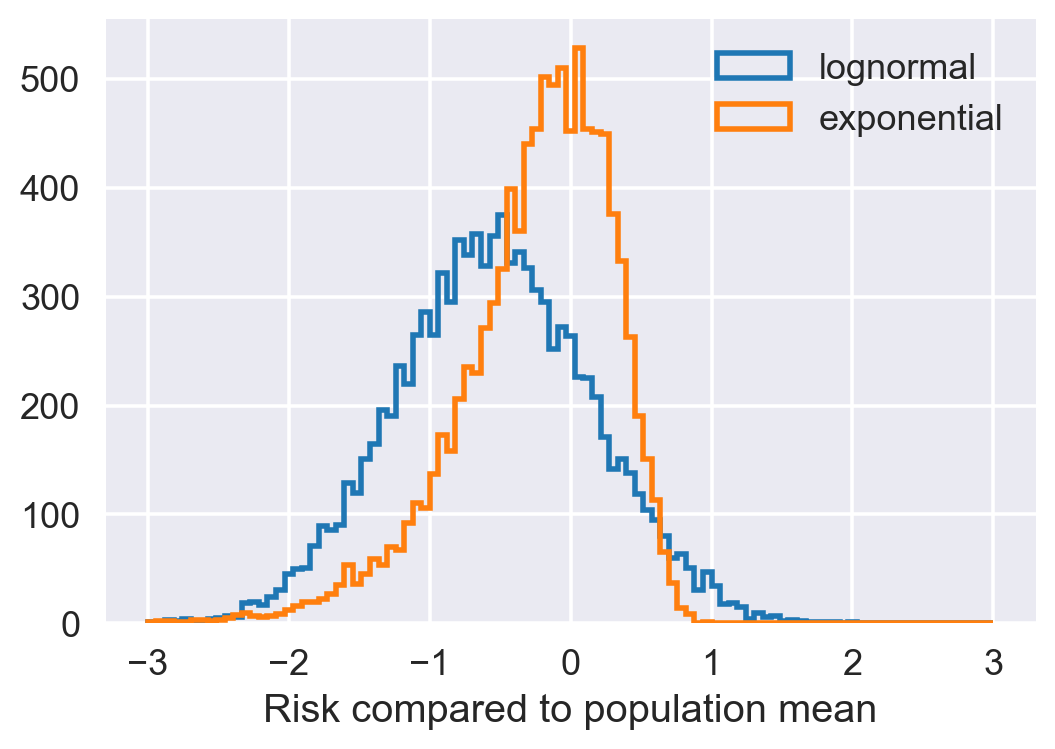

In [123]:
plt.figure(dpi=200)
plt.hist(np.log10(x), bins=np.linspace(-3,3,100), histtype="step", lw=2, label="lognormal")
plt.hist(np.log10(z), bins=np.linspace(-3,3,100), histtype="step", lw=2, label="exponential")

# plt.axvline(np.mean(x), c="C0", linestyle='dashed')
# plt.axvline(np.mean(z), c="C1", linestyle='dashed')

plt.legend()

plt.xlabel("Risk compared to population mean")

Jinja
36.57142857142857
Kanungu
56.852459016393446
Tororo
62.0


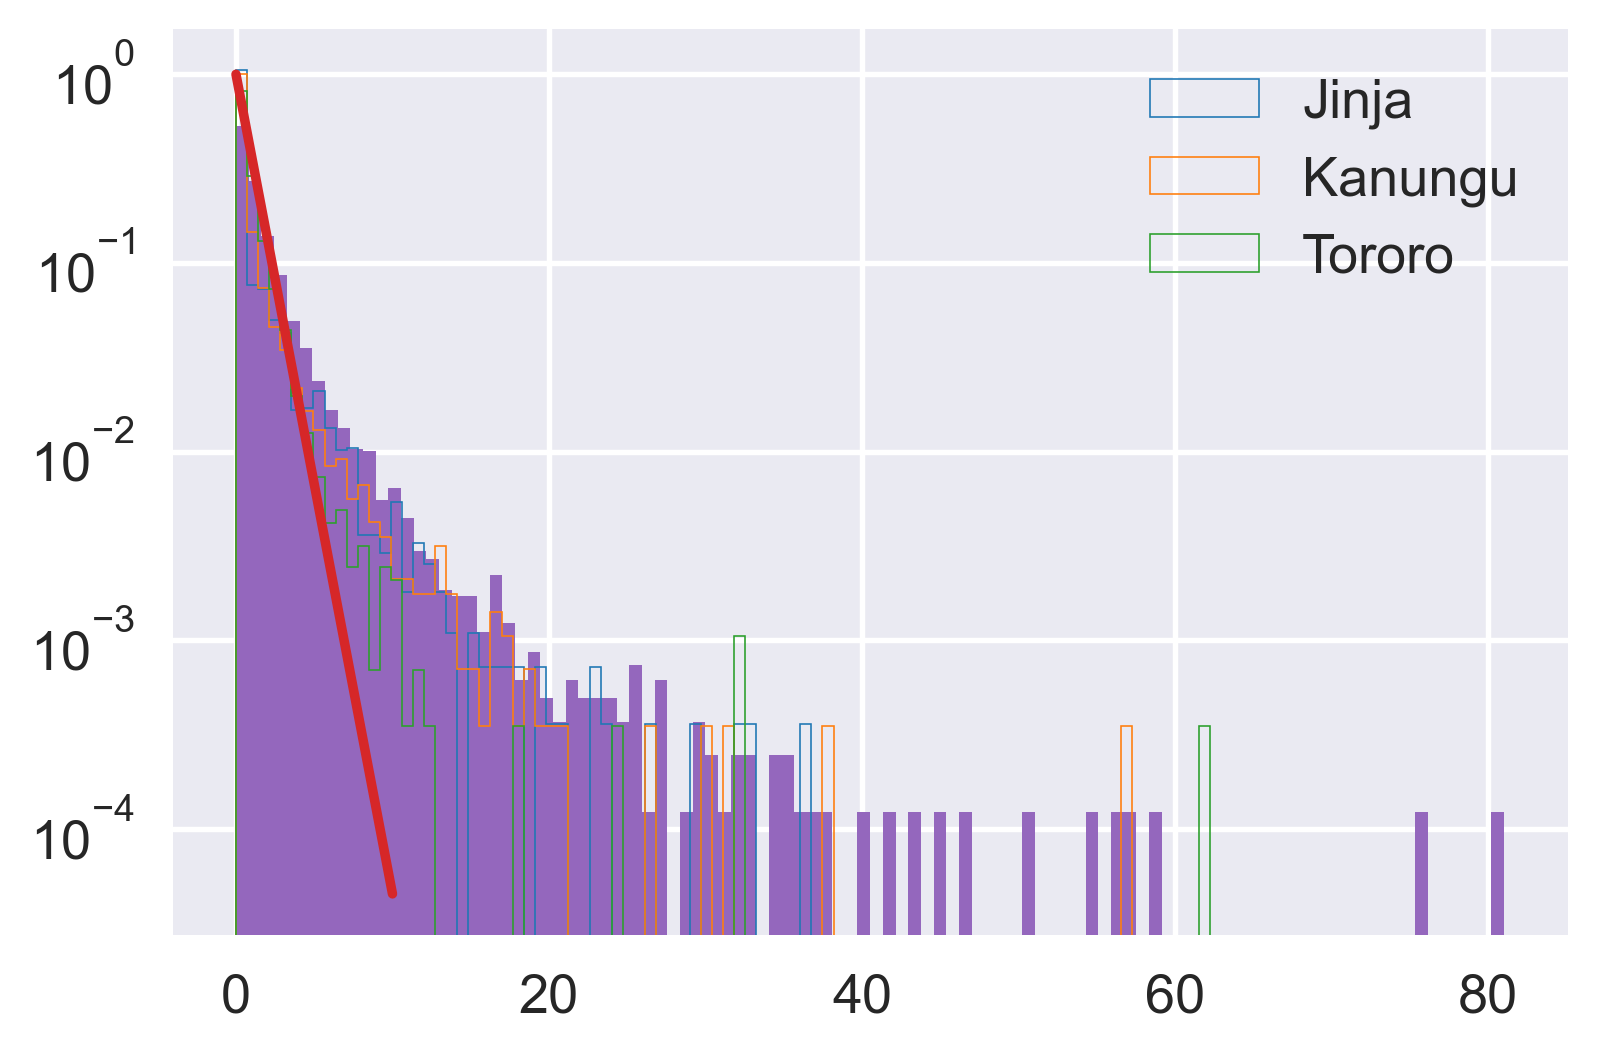

In [42]:
plt.figure(dpi=300)
for site, sdf in df_raw_with_mean.groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles_normalized_to_mean"]))
    plt.hist(sdf["totalanopheles_normalized_to_mean"], density=True, bins=np.linspace(0,70,100), label=site, histtype="step")
plt.yscale("log")
# plt.xscale("log")

xp = np.linspace(0,10,100)
plt.plot(xp,np.exp(-xp))

yg = np.random.normal(0,scale=1.2,size=10000)
yl = np.exp(yg)
yl_rescale = yl/np.mean(yl)
plt.hist(yl, bins=100, density=True)

# plt.xlim([0,100])
# plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]),bins=np.linspace(0,50,150), density=True, histtype='step', label="exponential", lw=1)
# plt.hist(df_lognormal["RelativeBitingRate"]/np.mean(df_lognormal["RelativeBitingRate"]),bins=np.linspace(0,50,150), density=True, label="lognormal", lw=1)

plt.legend()


Jinja
36.57142857142857
Kanungu
56.852459016393446
Tororo
62.0


Text(0.5, 0, 'Log10(Biting risk, compared to mean)')

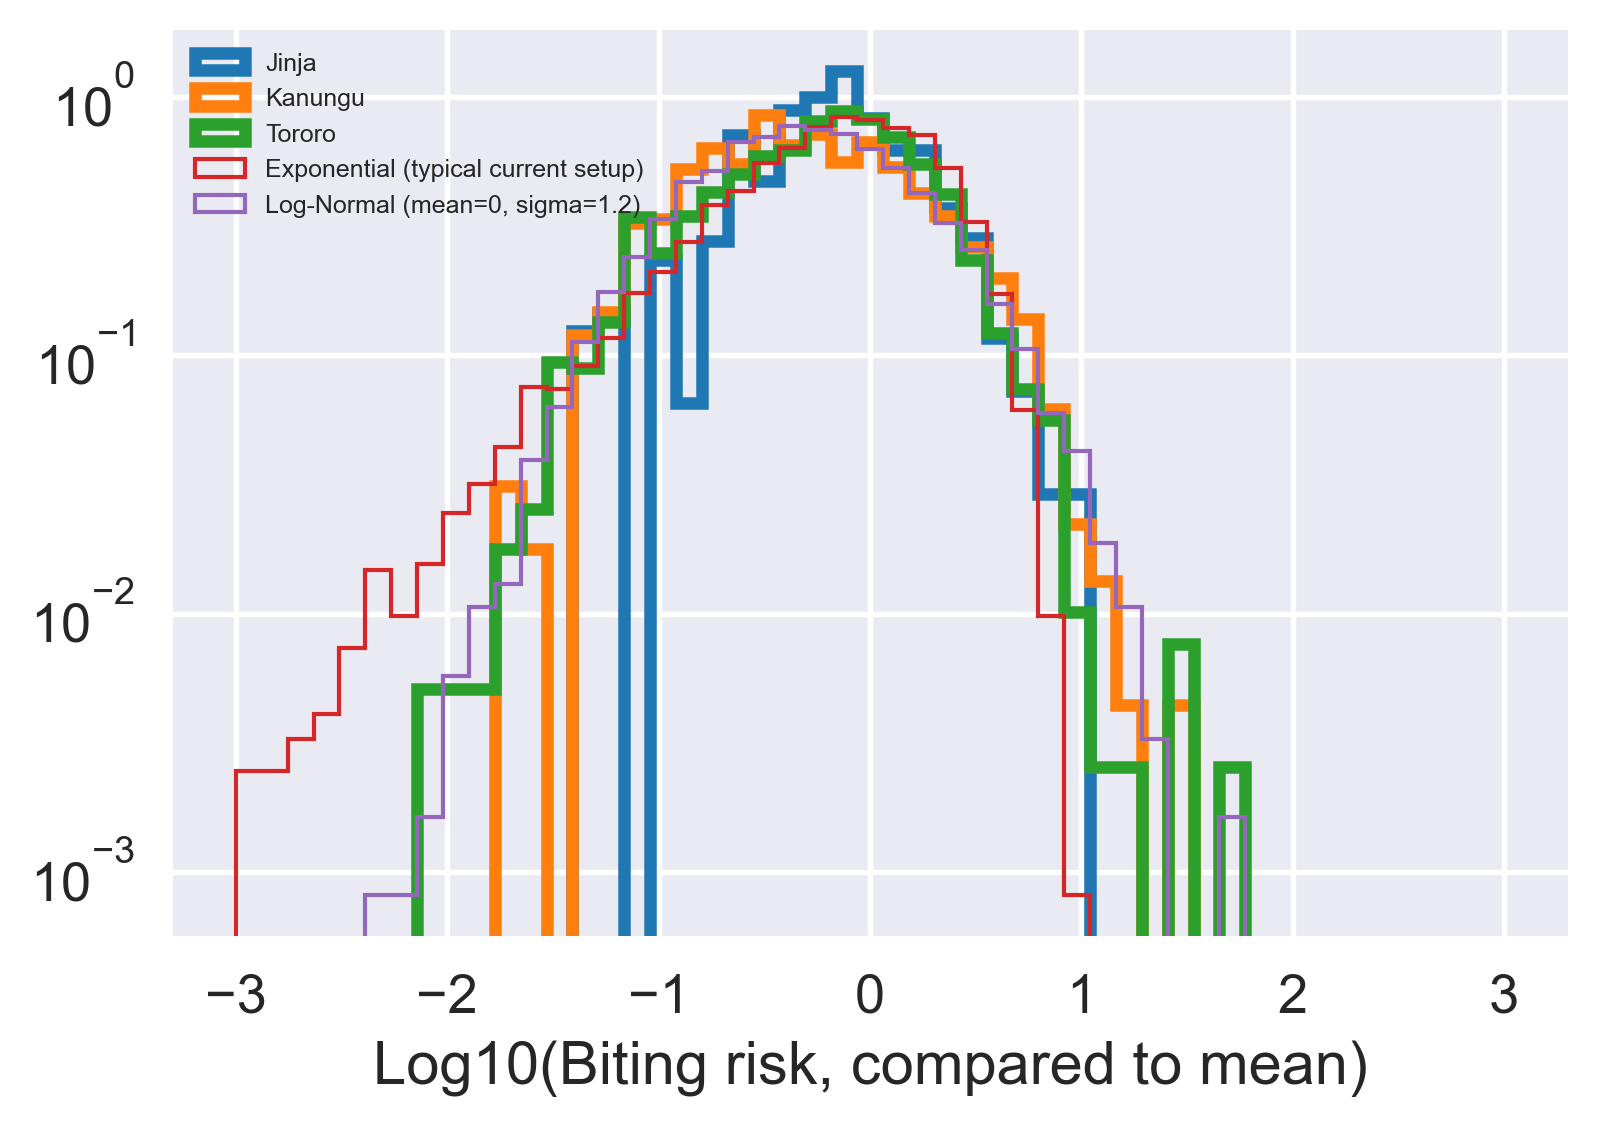

In [124]:
plt.figure(dpi=300)
for site, sdf in df_raw_with_mean.groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles_normalized_to_mean"]))
    sdf = sdf[sdf["totalanopheles_normalized_to_mean"]>0]
    plt.hist(np.log10(sdf["totalanopheles_normalized_to_mean"]/np.mean(sdf["totalanopheles_normalized_to_mean"])), density=True, bins=np.linspace(-3,3,50), label=site, histtype="step", lw=3)
plt.yscale("log")

# xp = np.linspace(0,10,100)
# plt.plot(np.log10(xp),np.exp(-xp))

# yg = np.random.normal(0,scale=1.2,size=10000)
# yl = np.exp(yg)
# plt.hist(yl, bins=100, density=True)

# plt.xlim([0,100])
plt.hist(np.log10(z), label="Exponential (typical current setup)", bins=np.linspace(-3,3,50), histtype='step', lw=1, density=True)
# plt.hist(np.log10(df_exp["RelativeBitingRate"]), label="Exponential (typical current setup)", bins=np.linspace(-3,3,50), histtype='step', lw=1, density=True)

# log-normal (something wrong with output right now - 12:54pm 1/13/21)
# plt.hist(np.log10(df_lognormal_v2["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', density=True)
# yg = np.random.normal(0,scale=1.2,size=10000)
# yl = np.exp(yg)

yl_rescale = return_lognormal(1.2,center=0, rescale_to_mean=True)
plt.hist(np.log10(yl_rescale), bins=np.linspace(-3,3,50), density=True, lw=1, label="Log-Normal (mean=0, sigma=1.2)", histtype="step")
plt.legend(loc=2, fontsize=6)

plt.xlabel("Log10(Biting risk, compared to mean)")

Jinja
36.57142857142857
Kanungu
56.852459016393446
Tororo
62.0


(-1.5, 1.5)

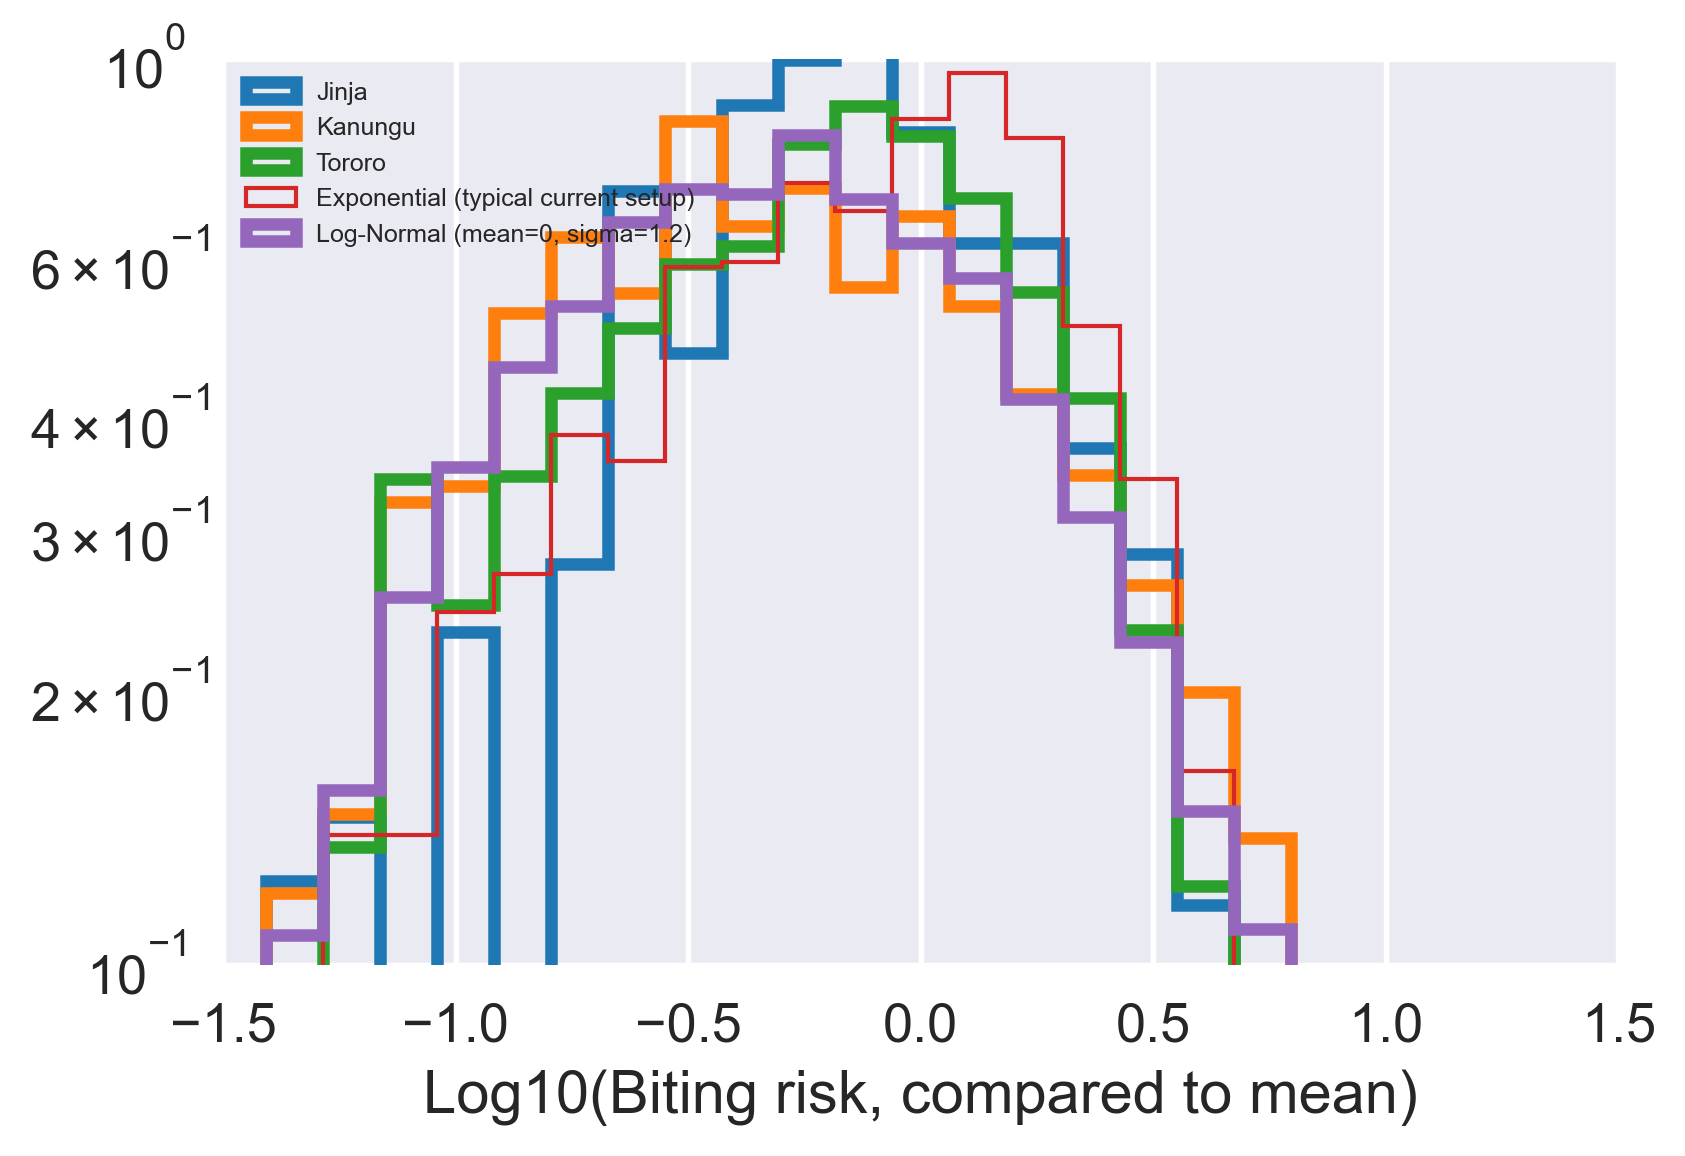

In [97]:
plt.figure(dpi=300)
for site, sdf in df_raw_with_mean.groupby("siteid"):
    print(site)
    print(np.max(sdf["totalanopheles_normalized_to_mean"]))
    sdf = sdf[sdf["totalanopheles_normalized_to_mean"]>0]
    plt.hist(np.log10(sdf["totalanopheles_normalized_to_mean"]/np.mean(sdf["totalanopheles_normalized_to_mean"])), density=True, bins=np.linspace(-3,3,50), label=site, histtype="step", lw=3)
plt.yscale("log")

# xp = np.linspace(0,10,100)
# plt.plot(np.log10(xp),np.exp(-xp))

# yg = np.random.normal(0,scale=1.2,size=10000)
# yl = np.exp(yg)
# plt.hist(yl, bins=100, density=True)

# plt.xlim([0,100])
plt.hist(np.log10(df_exp["RelativeBitingRate"]), label="Exponential (typical current setup)", bins=np.linspace(-3,3,50), histtype='step', lw=1, density=True)

# log-normal (something wrong with output right now - 12:54pm 1/13/21)
# plt.hist(np.log10(df_lognormal_v2["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', density=True)
# yg = np.random.normal(0,scale=1.2,size=10000)
# yl = np.exp(yg)

yl_rescale = return_lognormal(1.2,center=0, rescale_to_mean=True)
plt.hist(np.log10(yl_rescale), bins=np.linspace(-3,3,50), density=True, lw=3, label="Log-Normal (mean=0, sigma=1.2)", histtype="step")
plt.legend(loc=2, fontsize=6)

plt.xlabel("Log10(Biting risk, compared to mean)")

plt.ylim([0.1,1])
plt.xlim([-1.5,1.5])

In [131]:
log_bins=np.arange(-2,2.2,0.2)
print(log_bins)


[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
  1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00
  2.0000000e+00]


In [127]:
def likelihood_to_data(data_df, model_df):
    log_bins=np.arange(-3,3.2,0.2)
    
    # Different regimes where the different sites contribute, given discrete mosquito counts
    # Jinja: mean counts per month ~1.  So only include for bins >= 0
    # Kanungu: mean counts per month ~3.  So only include for bins >= log10(1/3) = -0.5
    # Tororo: mean counts per month ~30.  So only include for bins >= log10(1/30) = -1.5
    
    # Data seems OK if we lax those limits by a little 
    

In [130]:
for site, sdf in df_raw_with_mean.groupby("siteid"):
    print(site)
    print(sdf.describe())
#     print(np.max(sdf["totalanopheles_normalized_to_mean"]))
#     sdf = sdf[sdf["totalanopheles_normalized_to_mean"]>0]

Jinja
       totalanopheles     studyDay          hhid        month  \
count     3898.000000  3898.000000  3.898000e+03  3898.000000   
mean         0.893022   638.098769  2.074625e+08    20.752694   
std          3.638473   370.563872  5.761445e+06    12.331238   
min          0.000000     1.000000  2.010024e+08     0.000000   
25%          0.000000   314.000000  2.050052e+08    10.000000   
50%          0.000000   650.500000  2.060047e+08    21.000000   
75%          1.000000   955.000000  2.100124e+08    31.000000   
max        121.000000  1273.000000  2.210025e+08    42.000000   

       month_avg_anopheles  totalanopheles_normalized_to_mean  
count          3898.000000                        3898.000000  
mean              0.893022                           1.000000  
std               1.172754                           2.570981  
min               0.130952                           0.000000  
25%               0.317757                           0.000000  
50%               0.5631

Text(0.5, 0, 'Log10(Biting risk, compared to mean)')

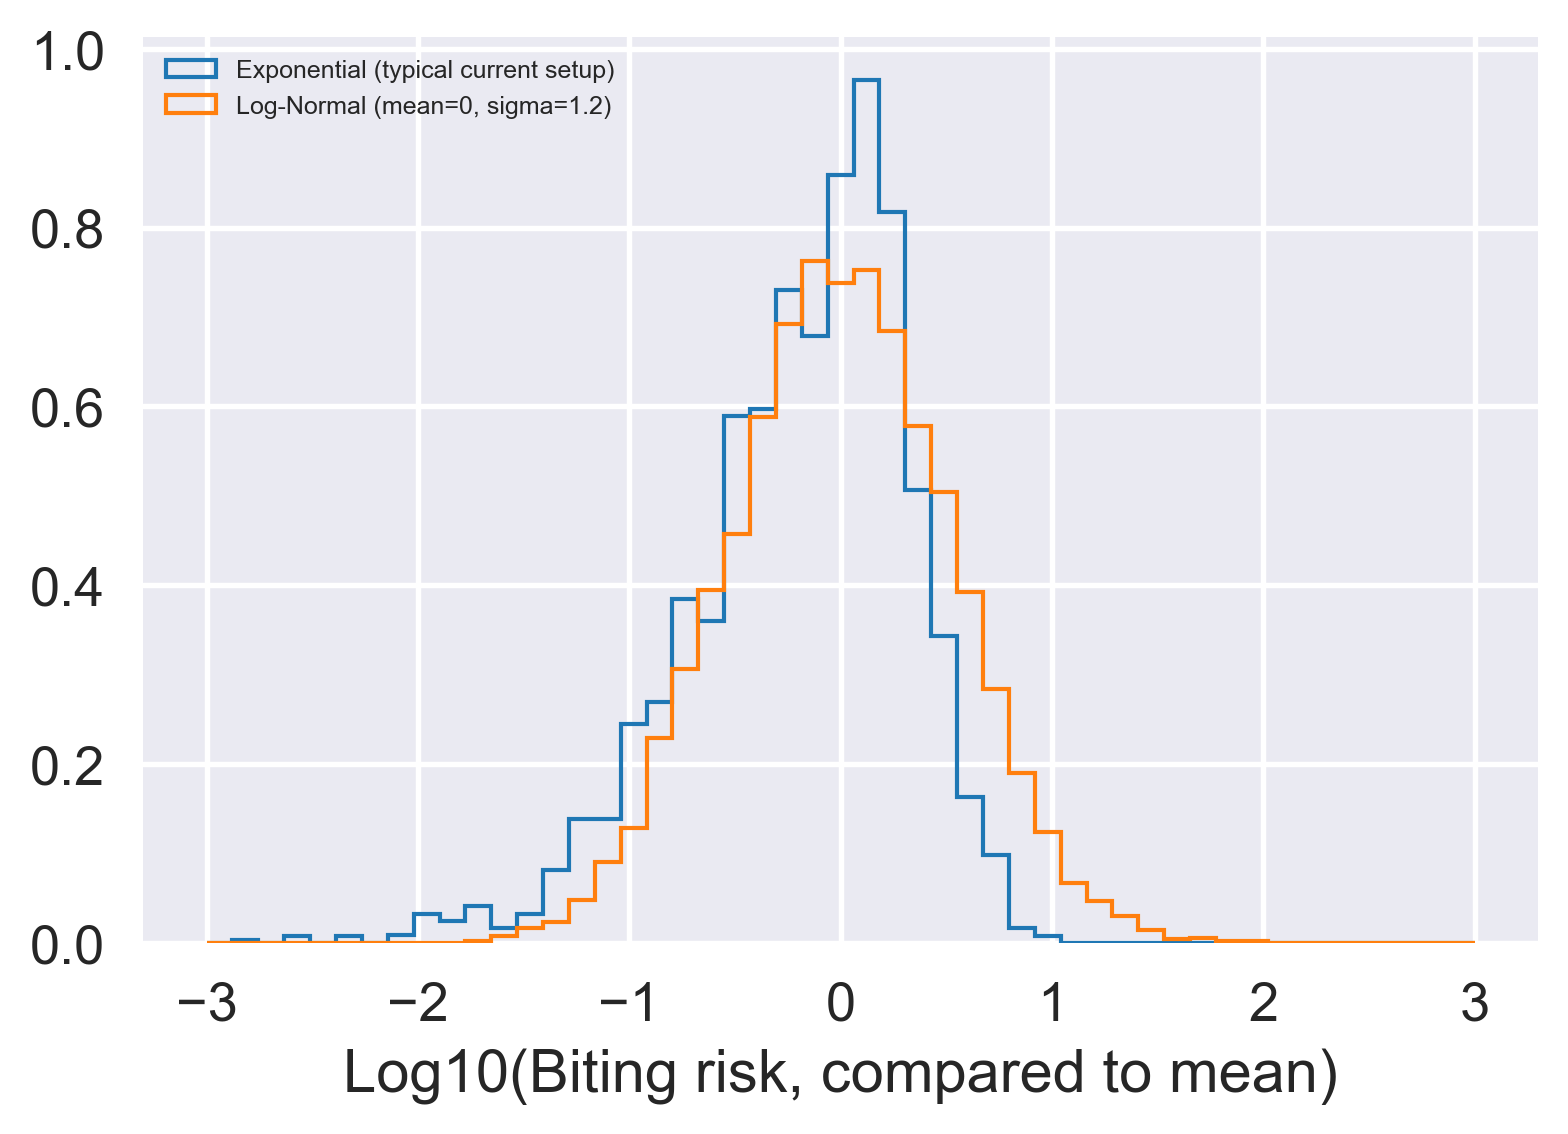

In [33]:
plt.figure(dpi=300)

plt.hist(np.log10(df_exp["RelativeBitingRate"]), label="Exponential (typical current setup)", bins=np.linspace(-3,3,50), histtype='step', lw=1, density=True)

# log-normal (something wrong with output right now - 12:54pm 1/13/21)
# plt.hist(np.log10(df_lognormal_v2["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', density=True)
# yg = np.random.normal(0,scale=1.2,size=10000)
# yl = np.exp(yg)

plt.hist(np.log10(yl), bins=np.linspace(-3,3,50), density=True, lw=1, label="Log-Normal (mean=0, sigma=1.2)", histtype="step")
plt.legend(loc=2, fontsize=6)

plt.xlabel("Log10(Biting risk, compared to mean)")

# What is Pareto fraction of new parameter set?

In [ ]:
yg = np.random.normal(0,scale=1.2,size=10000)
yl = np.exp(yg)
print(pareto_fraction(yl))

In [ ]:
#Comparing new and old recommendations, in linear space
yg = np.random.normal(0,scale=1.2,size=10000)
plt.hist(yg, bins=100, density=True, histtype="step")
yg = np.random.normal(0,scale=1.68,size=10000)
plt.hist(yg, bins=100, density=True, histtype="step")

In [ ]:
plt.figure(dpi=300)
# yg = np.random.normal(0,scale=1.2,size=10000)
# plt.hist(yg, bins=100, density=True, histtype="step")
# yg = np.random.normal(0,scale=1.68,size=10000)
# plt.hist(yg, bins=100, density=True, histtype="step")

xp = np.linspace(0,10,100)
plt.plot(xp,np.exp(-xp), label="exponential")

yg = np.random.normal(0,scale=1.2,size=10000)
yl = np.exp(yg)
plt.hist(yl, bins=np.linspace(0,30,100), density=True, label="lognormal, sigma=1.2")

yg = np.random.normal(0,scale=1.68,size=10000)
yl = np.exp(yg)
plt.hist(yl, bins=np.linspace(0,30,100), density=True, label="lognormal, sigma=1.68", histtype='step')
# plt.xlim([0])
plt.axvline(1,linestyle='dotted')

plt.legend()

# Something wrong with code output

In [28]:
df_lognormal_v1 = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_lognormal.csv")
df_lognormal_v2 = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_lognormal_seed9.csv")

(array([0.01031999, 0.0088457 , 0.01326855, 0.05307421, 0.09287987,
        0.12826268, 0.21436084, 0.29633102, 0.42901655, 0.48503933,
        0.49978216, 0.54843352, 0.50420501, 0.38493547, 0.26094821,
        0.22821911, 0.14153123, 0.07961132, 0.03095996, 0.01326855]),
 array([-2.46716157, -2.24108567, -2.01500978, -1.78893388, -1.56285798,
        -1.33678208, -1.11070619, -0.88463029, -0.65855439, -0.43247849,
        -0.20640259,  0.0196733 ,  0.2457492 ,  0.4718251 ,  0.697901  ,
         0.9239769 ,  1.15005279,  1.37612869,  1.60220459,  1.82828049,
         2.05435638]),
 [<matplotlib.patches.Polygon at 0x1d6ccbc9438>])

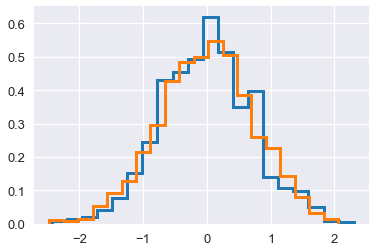

In [5]:
plt.hist(np.log10(df_lognormal_v1["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)
plt.hist(np.log10(df_lognormal_v2["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)

In [ ]:
np.sum()

# Get binned risk distribution for simulation IP bins

In [5]:
df_ln = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_lognormal_seed9.csv")
df_exp = pd.read_csv(output_folder + "biting_risk_distributions/adults_only/ReportEventRecorder_exponential.csv")

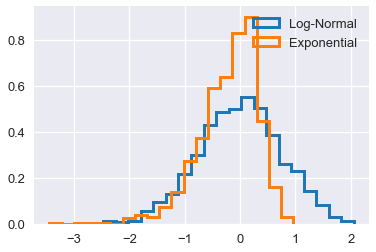

In [6]:
plt.hist(np.log10(df_ln["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)
plt.hist(np.log10(df_exp["RelativeBitingRate"]), label="Exponential", bins=20, histtype='step', lw=3, density=True)
plt.legend()

In [11]:
np.sum(df_ln["RelativeBitingRate"]>5)/np.sum(df_ln["RelativeBitingRate"])

0.04697700804562848

In [12]:
np.sum(df_exp["RelativeBitingRate"]>5)/np.sum(df_exp["RelativeBitingRate"])

0.013908339132972063

In [14]:
df_exp["RelativeBitingRate"].describe()

count    29991.000000
mean         1.078813
std          1.074881
min          0.000362
25%          0.318291
50%          0.786181
75%          1.499030
max          9.179660
Name: RelativeBitingRate, dtype: float64

In [20]:
df_ln["RelativeBitingRate"].describe()

count    30003.000000
mean         3.609916
std          8.098104
min          0.003411
25%          0.309102
50%          1.031170
75%          3.090090
max        113.333000
Name: RelativeBitingRate, dtype: float64

In [16]:
(df_ln["RelativeBitingRate"]/np.mean(df_ln["RelativeBitingRate"])).describe()

count    30003.000000
mean         1.000000
std          2.243294
min          0.000945
25%          0.085626
50%          0.285649
75%          0.856001
max         31.394915
Name: RelativeBitingRate, dtype: float64

(0.0001, 1.0)

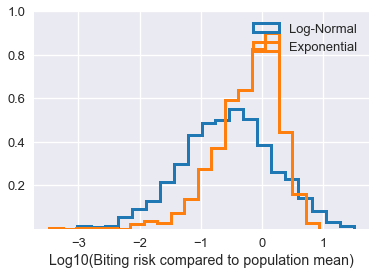

In [34]:
plt.hist(np.log10(df_ln["RelativeBitingRate"]/np.mean(df_ln["RelativeBitingRate"])), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)
plt.hist(np.log10(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"])), label="Exponential", bins=20, histtype='step', lw=3, density=True)
plt.legend()
plt.xlabel("Log10(Biting risk compared to population mean)")

# plt.yscale("log")

plt.ylim([1e-4,1])

In [28]:
for p in [5,10,20,40,60,80,90,95]:
    print(np.percentile(df_exp["RelativeBitingRate"], p))

0.06901130000000001
0.12770399999999998
0.25011
0.555251
1.05322
1.63864
2.43471
3.167515


In [29]:
for p in [5,10,20,40,60,80,90,95]:
    print(np.percentile(df_ln["RelativeBitingRate"]/np.mean(df_ln["RelativeBitingRate"]), p))

0.015424376551623905
0.03097163685719308
0.06753176977410633
0.18013799857256907
0.43328988930557655
1.125932091040637
2.5596802293004894
4.8970117797423


In [31]:
df_ln_norm = df_ln.copy(deep=True)
df_exp_norm = df_exp.copy(deep=True)
df_ln_norm["RelativeBitingRate"] = df_ln_norm["RelativeBitingRate"]/np.mean(df_ln_norm["RelativeBitingRate"])
df_exp_norm["RelativeBitingRate"] = df_exp_norm["RelativeBitingRate"]/np.mean(df_exp_norm["RelativeBitingRate"])

In [34]:
print(np.mean(df_exp_norm[df_exp_norm["RelativeBitingRate"] > np.percentile(df_exp_norm["RelativeBitingRate"],90)]["RelativeBitingRate"]))

3.3154889817020567


In [35]:
print(np.mean(df_ln_norm[df_ln_norm["RelativeBitingRate"] > np.percentile(df_ln_norm["RelativeBitingRate"],90)]["RelativeBitingRate"]))

6.060311656406136


In [ ]:
# Risk groups (proposed)
# R1: <10
# R2: 10-30
# R3: 30-50
# R4: 50-70
# R5: 70-90
# R6: >90

In [49]:
def get_risk_dict(df):
    rbin_edges = [0,10,30,50,70,90,100]
    n_rbins = len(rbin_edges)-1

    return_dict = {}
    
    for ri in np.arange(n_rbins):
        cut = np.logical_and(df["RelativeBitingRate"] >= np.percentile(df["RelativeBitingRate"], rbin_edges[ri]), 
                             df["RelativeBitingRate"] < np.percentile(df["RelativeBitingRate"], rbin_edges[ri+1]))
        return_dict[ri+1] = np.mean(df[cut]["RelativeBitingRate"])
    
    return return_dict


In [50]:
get_risk_dict(df_ln_norm)

{1: 0.015950309902003395,
 2: 0.06799232068736537,
 3: 0.18582850469865606,
 4: 0.44569413998025526,
 5: 1.262291556204329,
 6: 5.770801262799212}

In [51]:
get_risk_dict(df_exp_norm)

{1: 0.0638961764134679,
 2: 0.2328965105550789,
 3: 0.5182887772698694,
 4: 0.9664379343106629,
 5: 1.5960431587658483,
 6: 3.252335507816986}

In [52]:
df_risk =pd.read_csv("pop_risk_distribution.csv")

In [55]:
df_risk["percentile_bot"].to_dict()

{0: 0,
 1: 10,
 2: 30,
 3: 50,
 4: 70,
 5: 90,
 6: 0,
 7: 10,
 8: 30,
 9: 50,
 10: 70,
 11: 90}

Text(0.5, 0, 'Log10(Biting risk compared to population mean)')

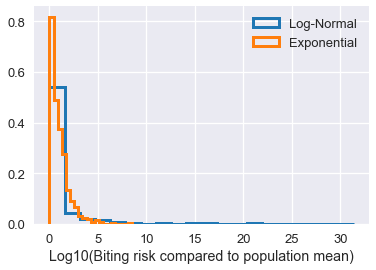

In [7]:
plt.hist(df_ln["RelativeBitingRate"]/np.mean(df_ln["RelativeBitingRate"]), label="Log-Normal", bins=20, histtype='step', lw=3, density=True)
plt.hist(df_exp["RelativeBitingRate"]/np.mean(df_exp["RelativeBitingRate"]), label="Exponential", bins=20, histtype='step', lw=3, density=True)
plt.legend()
plt.xlabel("Log10(Biting risk compared to population mean)")

In [75]:
# More troubleshooting

In [77]:
j = df_raw_with_mean[df_raw_with_mean["siteid"]=="Jinja"]

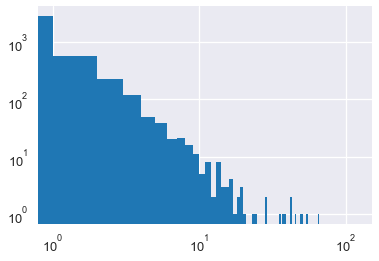

In [85]:
plt.hist(j["totalanopheles"], bins=np.arange(np.max(j["totalanopheles"])))
plt.yscale("log")
plt.xscale("log")

(array([ 37.,  32.,  89., 181., 235., 253., 183.,  79.,  24.,   8.]),
 array([-0.75665743, -0.5246775 , -0.29269756, -0.06071763,  0.17126231,
         0.40324225,  0.63522218,  0.86720212,  1.09918205,  1.33116199,
         1.56314193]),
 <BarContainer object of 10 artists>)

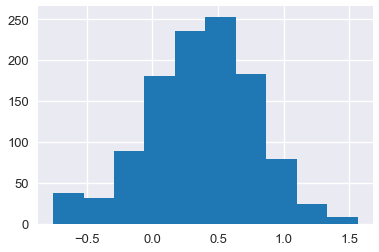

In [89]:
plt.hist(np.log10(j["totalanopheles_normalized_to_mean"][j["totalanopheles_normalized_to_mean"]>0]))
# plt.yscale("log")
# plt.xscale("log")

In [90]:
np.mean(j["totalanopheles_normalized_to_mean"])

1.0

In [91]:
np.mean(j["totalanopheles_normalized_to_mean"][j["totalanopheles_normalized_to_mean"]>0])

3.477252453166815

# Drawing from exponential

In [101]:
from numpy.random import exponential

(array([1.000e+00, 6.000e+00, 1.700e+01, 3.900e+01, 1.780e+02, 5.810e+02,
        1.711e+03, 3.746e+03, 3.417e+03, 3.040e+02]),
 array([-4.28204700e+00, -3.74649994e+00, -3.21095289e+00, -2.67540584e+00,
        -2.13985879e+00, -1.60431174e+00, -1.06876469e+00, -5.33217634e-01,
         2.32941786e-03,  5.37876470e-01,  1.07342352e+00]),
 <BarContainer object of 10 artists>)

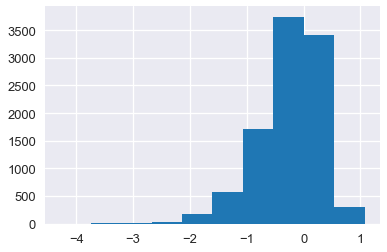

In [106]:
x = exponential(size=10000)

plt.hist(np.log10(x))

# Alternative likelihood approach: "What is likelihood of seeing data, given the underlying distribution"

Instead of fitting distribution in aggregate, take each month as a distribution and add the synthetic data, then look at distribution difference (apply differencing here)

In [336]:
def generate_model_counts_for_month(distribution_type,mean_counts,n_obs,zero_offset=0,sigma=1.2):
    if distribution_type=="exponential":
        model_counts = np.round(return_exponential(size=n_obs)*mean_counts)
    elif distribution_type=="lognormal":
        model_counts = np.round(return_lognormal(sigma=sigma, size=n_obs)*mean_counts)
        
    if zero_offset > 0:
        model_counts[model_counts==0] = zero_offset
    return model_counts

In [335]:
def generate_model_counts_for_site(site_df, distribution_type, sigma=1.2, normalized_by_month_mean=True,zero_offset=0):
    model_counts = np.array([])
    
    for i, month_df in site_df.groupby("month"):
        n_obs = len(month_df["totalanopheles"])
        mean_counts = np.mean(month_df["totalanopheles"])
        model_counts_this_month = generate_model_counts_for_month(distribution_type, 
                                                                  mean_counts, 
                                                                  n_obs,
                                                                  zero_offset=zero_offset, 
                                                                  sigma=sigma)
        if normalized_by_month_mean:
            model_counts_this_month /= mean_counts
        model_counts = np.append(model_counts, model_counts_this_month)
#         print(model_counts_this_month)
    
    return model_counts

In [337]:
def bootstrap_model_counts_for_site(site_df, distribution_type, logbins, N=100, sigma=1.2,normalized_by_month_mean=True, return_mean_distribution=False,zero_offset=1e-2):
    if normalized_by_month_mean == False:
        raise NotImplementedError
        
    model_counts = np.array([])
    
    n_bins = len(logbins)-1
    hist_counts = np.zeros([N,n_bins])
    
    for i in np.arange(N):
        model_counts_this_realization = generate_model_counts_for_site(site_df,
                                                                       distribution_type, 
                                                                       normalized_by_month_mean=normalized_by_month_mean,
                                                                       zero_offset=zero_offset,
                                                                      sigma=sigma)
        model_counts = np.append(model_counts, model_counts_this_realization)
        
        hist_this_realization, bin_edges = np.histogram(np.log10(model_counts_this_realization),bins=logbins, density=True)
        hist_counts[i,:] = hist_this_realization 
        
        # Add bin for zero counts?  #fixme #future
        
#     if return_mean_distribution:
#         np.histogram()
    return model_counts, hist_counts

In [223]:
np.histogram?

In [145]:
j = df_raw_with_mean[df_raw_with_mean["siteid"]=="Jinja"]

In [153]:
foo = generate_model_counts_for_site(j,"exponential")

In [162]:
bar = generate_model_counts_for_site(j,"lognormal")

In [201]:
np.histogram?

Text(0.5, 0, 'Monthly mosquito counts')

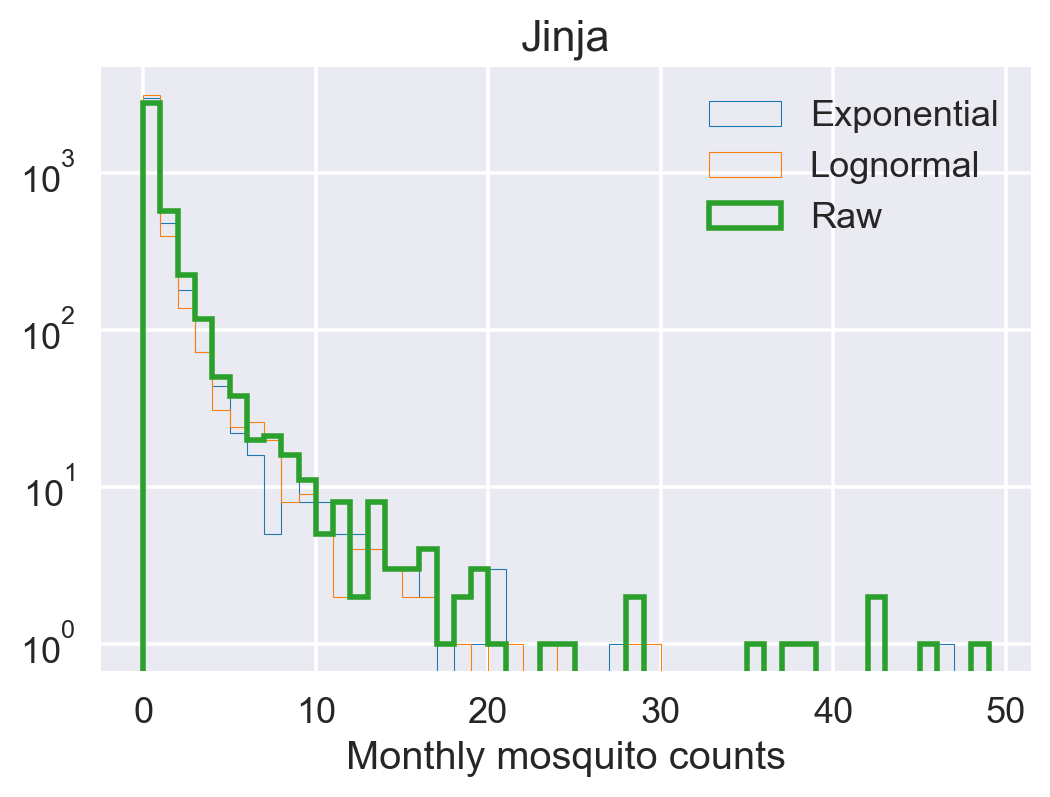

In [170]:
site_df = df_raw_with_mean[df_raw_with_mean["siteid"]=="Jinja"]
foo = generate_model_counts_for_site(site_df,"exponential")
bar = generate_model_counts_for_site(site_df,"lognormal")

plt.figure(dpi=200)
plt.title("Jinja")
plt.hist(foo,bins=np.arange(50), histtype="step", label="Exponential")
plt.hist(bar,bins=np.arange(50), histtype="step", label="Lognormal")
plt.hist(site_df["totalanopheles"],bins=np.arange(50),histtype="step", label="Raw", lw=2)

plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

Text(0.5, 0, 'Monthly mosquito counts')

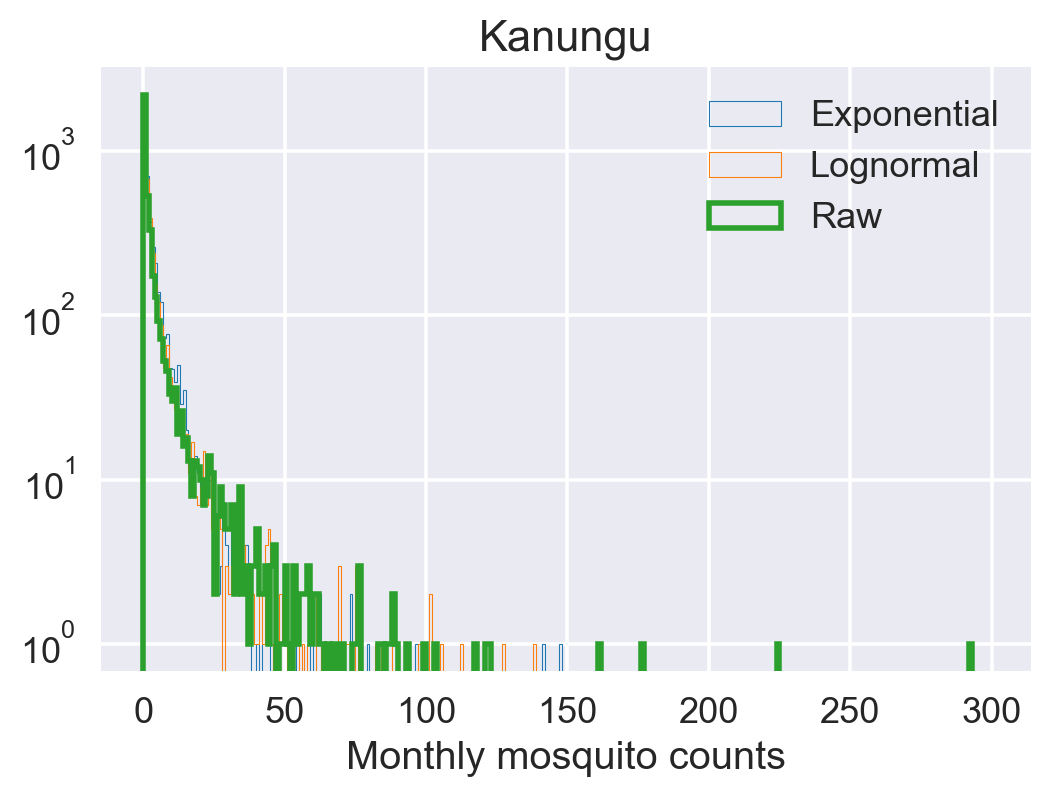

In [174]:
site_df = df_raw_with_mean[df_raw_with_mean["siteid"]=="Kanungu"]
foo = generate_model_counts_for_site(site_df,"exponential")
bar = generate_model_counts_for_site(site_df,"lognormal")

plt.figure(dpi=200)
plt.title("Kanungu")
plt.hist(foo,bins=np.arange(300), histtype="step", label="Exponential")
plt.hist(bar,bins=np.arange(300), histtype="step", label="Lognormal")
plt.hist(site_df["totalanopheles"],bins=np.arange(300),histtype="step", label="Raw", lw=2)

plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

Text(0.5, 0, 'Monthly mosquito counts')

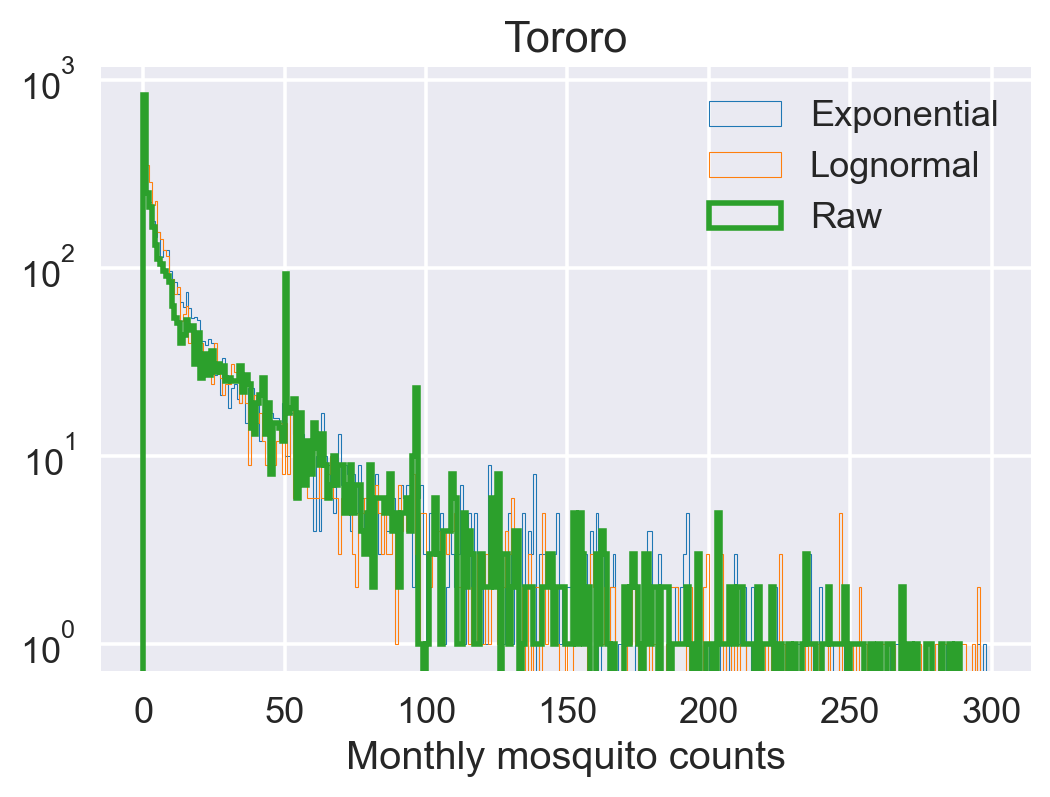

In [173]:
site_df = df_raw_with_mean[df_raw_with_mean["siteid"]=="Tororo"]
foo = generate_model_counts_for_site(site_df,"exponential")
bar = generate_model_counts_for_site(site_df,"lognormal")

plt.figure(dpi=200)
plt.title("Tororo")
plt.hist(foo,bins=np.arange(300), histtype="step", label="Exponential")
plt.hist(bar,bins=np.arange(300), histtype="step", label="Lognormal")
plt.hist(site_df["totalanopheles"],bins=np.arange(300),histtype="step", label="Raw", lw=2)

plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

In [302]:
# Try offsetting zero counts slightly:
df_raw_with_mean_offset = df_raw_with_mean.copy(deep=True)
df_raw_with_mean_offset["totalanopheles"][df_raw_with_mean_offset["totalanopheles"]==0] = 1e-2
df_raw_with_mean_offset["totalanopheles_normalized_to_mean"] = df_raw_with_mean_offset["totalanopheles"]/df_raw_with_mean_offset["month_avg_anopheles"]

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Monthly mosquito counts')

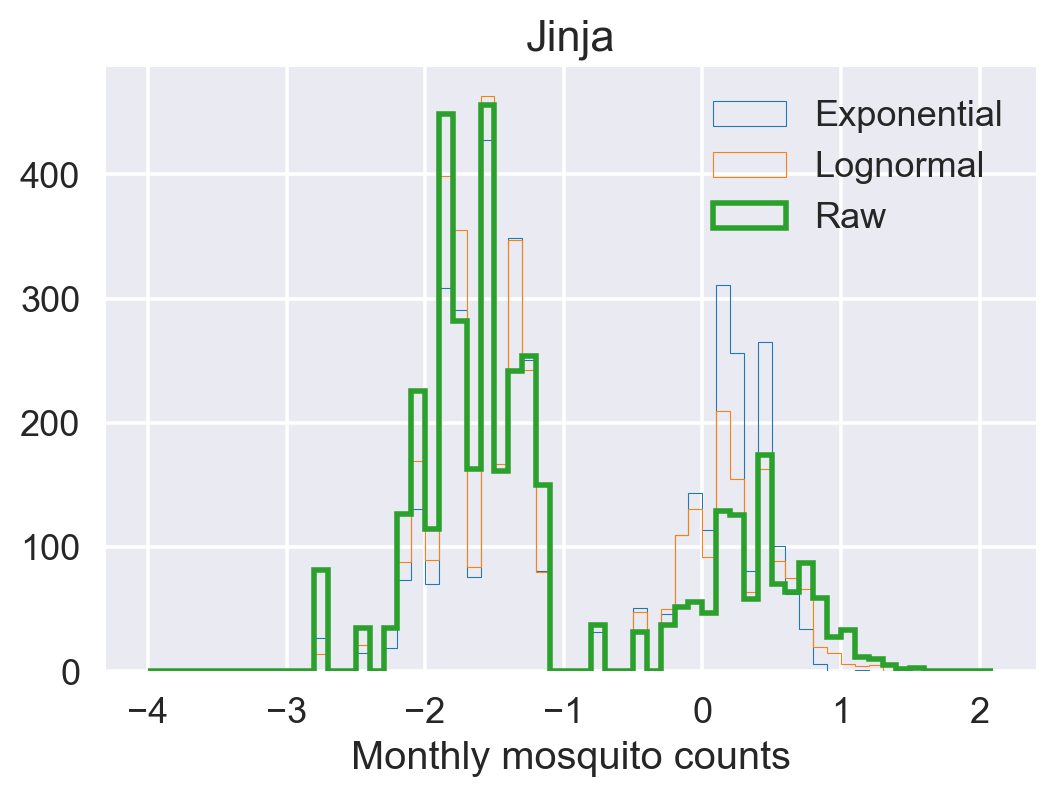

In [328]:
site="Jinja"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2)

plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-4,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential")
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Lognormal")
plt.hist(np.log10(site_df["totalanopheles_normalized_to_mean"]),bins=bins,histtype="step", label="Raw", lw=2)

# plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

Text(0.5, 0, 'Monthly mosquito counts')

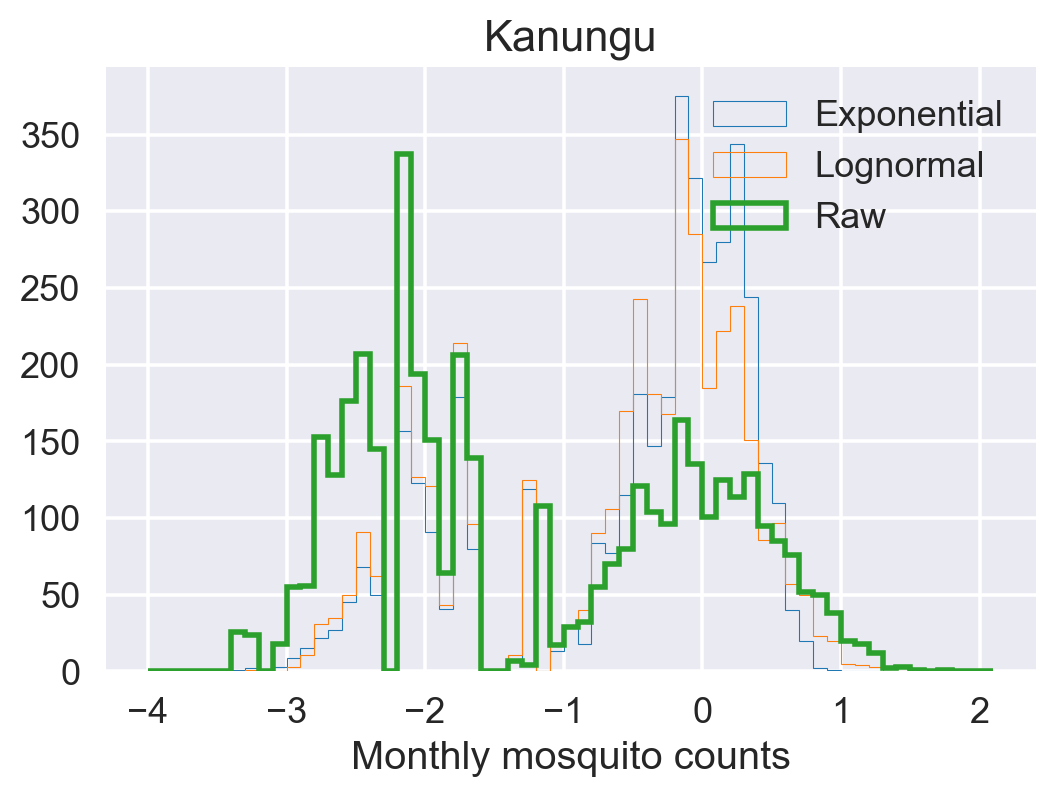

In [313]:
site="Kanungu"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2)
raw = site_df["totalanopheles_normalized_to_mean"]



plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-4,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential")
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Lognormal")
plt.hist(np.log10(raw),bins=bins,histtype="step", label="Raw", lw=2)

# plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

Text(0.5, 0, 'Monthly mosquito counts')

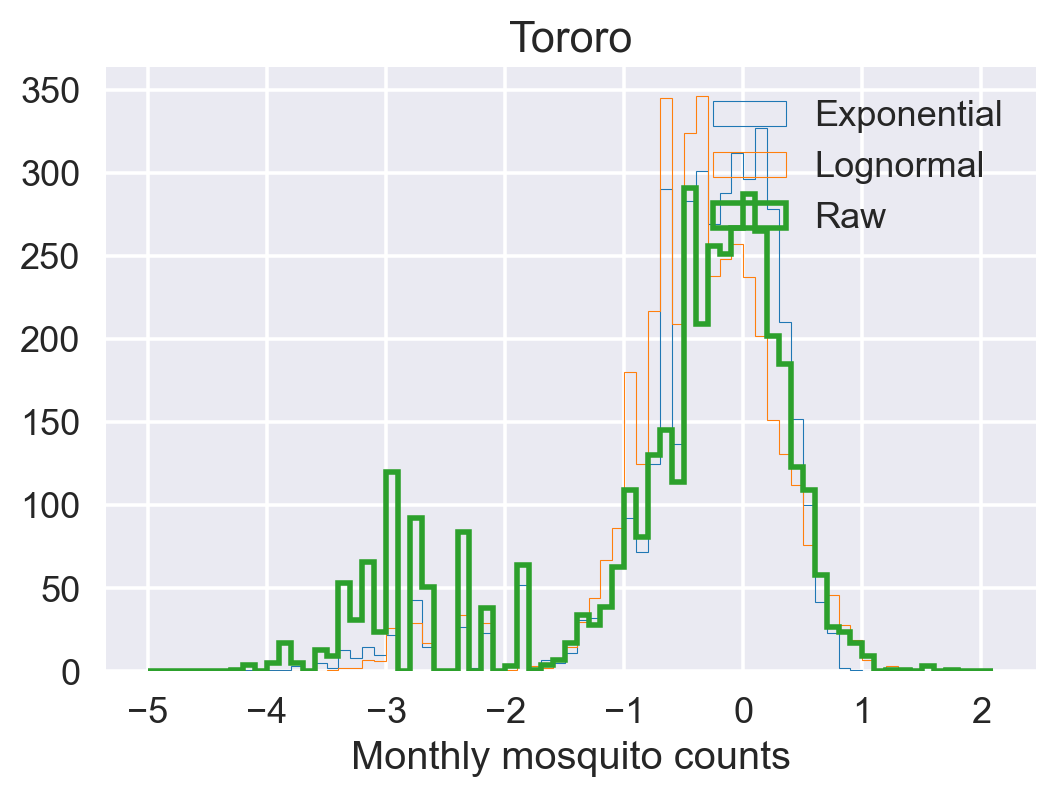

In [365]:
site="Tororo"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2)

plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-5,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential")
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Lognormal")
plt.hist(np.log10(site_df["totalanopheles_normalized_to_mean"]),bins=bins,histtype="step", label="Raw", lw=2)

# plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

In [318]:
site="Tororo"
site_df = df_raw_with_mean[df_raw_with_mean["siteid"]==site]
foo = bootstrap_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True)
bar = bootstrap_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True)

plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-2,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential", density=True)
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Lognormal", density=True)
plt.hist(np.log10(site_df["totalanopheles_normalized_to_mean"]),bins=bins,histtype="step", label="Raw", lw=2, density=True)

# plt.yscale("log")
plt.legend()
plt.xlabel("Monthly mosquito counts")

TypeError: bootstrap_model_counts_for_site() missing 1 required positional argument: 'logbins'

In [244]:
site_df = df_raw_with_mean[df_raw_with_mean["siteid"]==site]
logbins = np.arange(-2,2.2,0.1)

counts, hist_realizations = bootstrap_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,logbins=logbins)
# bar = bootstrap_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,logbins=logbins)

c:\users\jsuresh\venv\default_venv\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


In [245]:
a.shape

(403800,)

<ErrorbarContainer object of 3 artists>

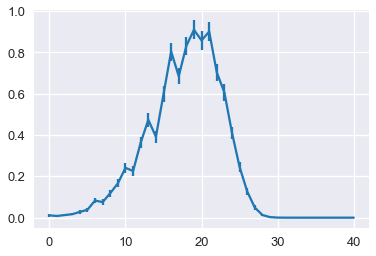

In [246]:
c=np.mean(b,axis=0)
s = np.std(b,axis=0)
plt.errorbar(np.arange(len(c)),c,s)

OK standard deviations are tiny anyways.  Just do Euclidean distance, which is simpler anyways.

In [258]:
def weighted_squares(raw_data, sim_data):
    return np.sqrt(np.sum((raw_data-sim_data)**2/raw_data))
    
#     num_obs = len(raw_data)
#     return math.sqrt(sum([(raw_data[x] - sim_data[x])**2/raw_data[x] for x in range(num_obs)])) * -1

In [338]:
def likelihood_model_site(site, model_type, sigma=1.2):
    # Generate N model realizations
    # Bin into histogram
    site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
    logbins = np.arange(-5,2.1,0.1)

    allcounts, hist_realizations = bootstrap_model_counts_for_site(site_df,
                                                                   model_type,
                                                                   normalized_by_month_mean=True,
                                                                   logbins=logbins,
                                                                   zero_offset=1e-2,
                                                                  sigma=sigma)
    model_hist_mean = np.mean(hist_realizations,axis=0)
    
    # Get Euclidean distance between data and model
    raw_hist, bin_edges = np.histogram(np.log10(site_df["totalanopheles_normalized_to_mean"]),bins=logbins,density=True)
    
    ll = weighted_squares(raw_hist+1e-4,model_hist_mean+1e-4)
    return ll

In [350]:
def likelihood_model(model_type, sigma=1.2, verbose=True):
    j = likelihood_model_site("Jinja", model_type, sigma=sigma)
    k = likelihood_model_site("Kanungu", model_type, sigma=sigma)
    t = likelihood_model_site("Tororo", model_type, sigma=sigma)
    
#     if verbose:
#         print(j)
#         print(k)
#         print(t)
    return np.sum(j+k+t),j,k,t

In [333]:
likelihood_model("exponential")

1.7816130009697007
3.9183197841665933
1.3019762460658975


7.001909031202191

In [340]:
likelihood_model("lognormal")

1.2345980545718052
3.5740347009592446
2.061725901965593


6.870358657496642

In [351]:
sigma_to_test = np.arange(0.8,2,0.1)
total_arr = np.zeros(len(sigma_to_test))
j_arr = np.zeros_like(total_arr)
k_arr = np.zeros_like(total_arr)
t_arr = np.zeros_like(total_arr)

i=0
for s in sigma_to_test:
    l_arr[i],j_arr[i],k_arr[i],t_arr[i] = likelihood_model("lognormal",sigma=s)
    i+=1

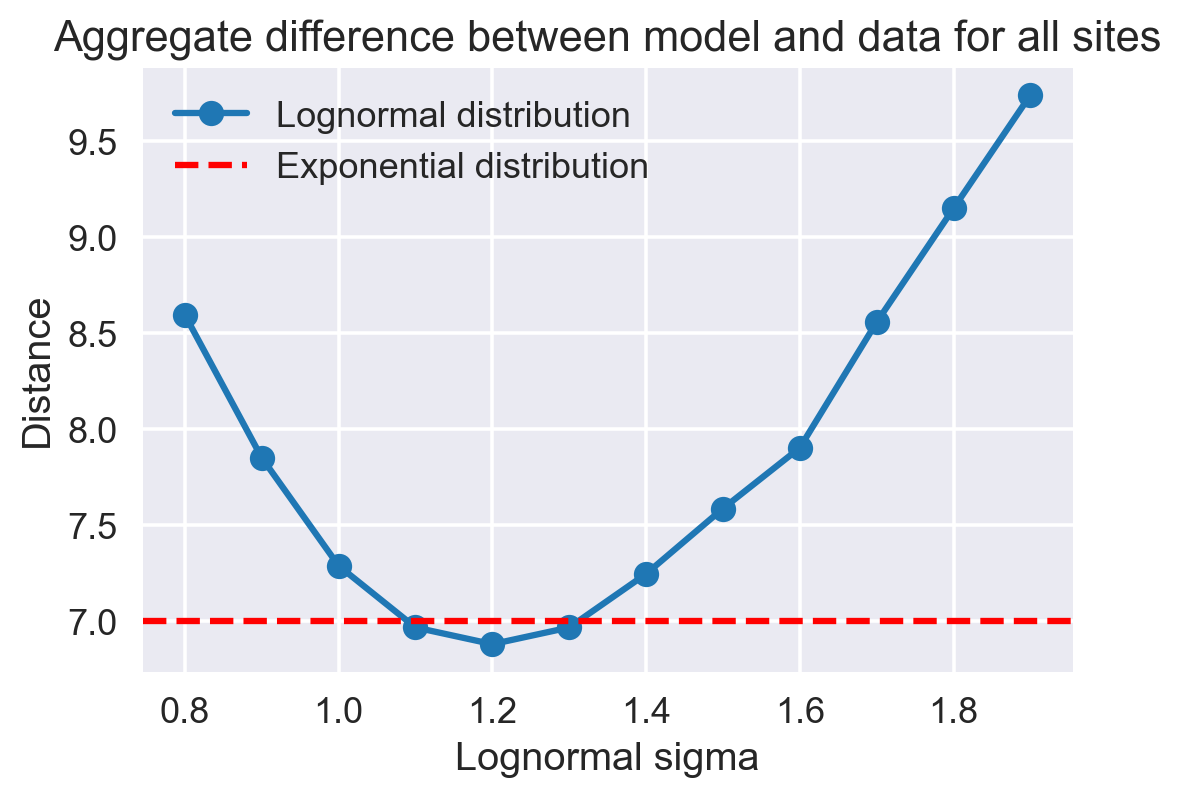

In [374]:
plt.figure(dpi=200)
plt.plot(sigma_to_test,l_arr, marker='o', label="Lognormal distribution")
plt.axhline(7.001909031202191,linestyle='dashed',c="red", label="Exponential distribution")
plt.title("Aggregate difference between model and data for all sites")
plt.ylabel("Distance")
plt.xlabel("Lognormal sigma")
plt.legend()


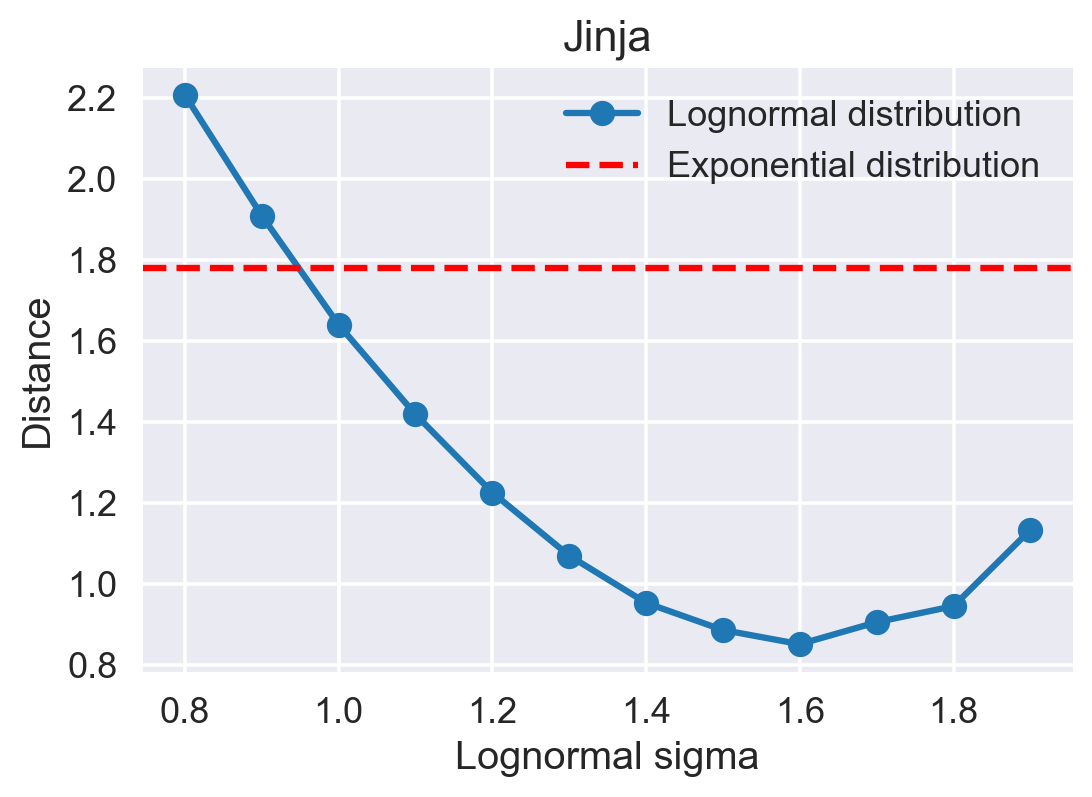

In [376]:
plt.figure(dpi=200)
plt.plot(sigma_to_test,j_arr, marker='o', label="Lognormal distribution")
plt.axhline(1.7816130009697007,linestyle='dashed',c="red", label="Exponential distribution")
plt.title("Jinja")
plt.ylabel("Distance")
plt.xlabel("Lognormal sigma")
plt.legend()

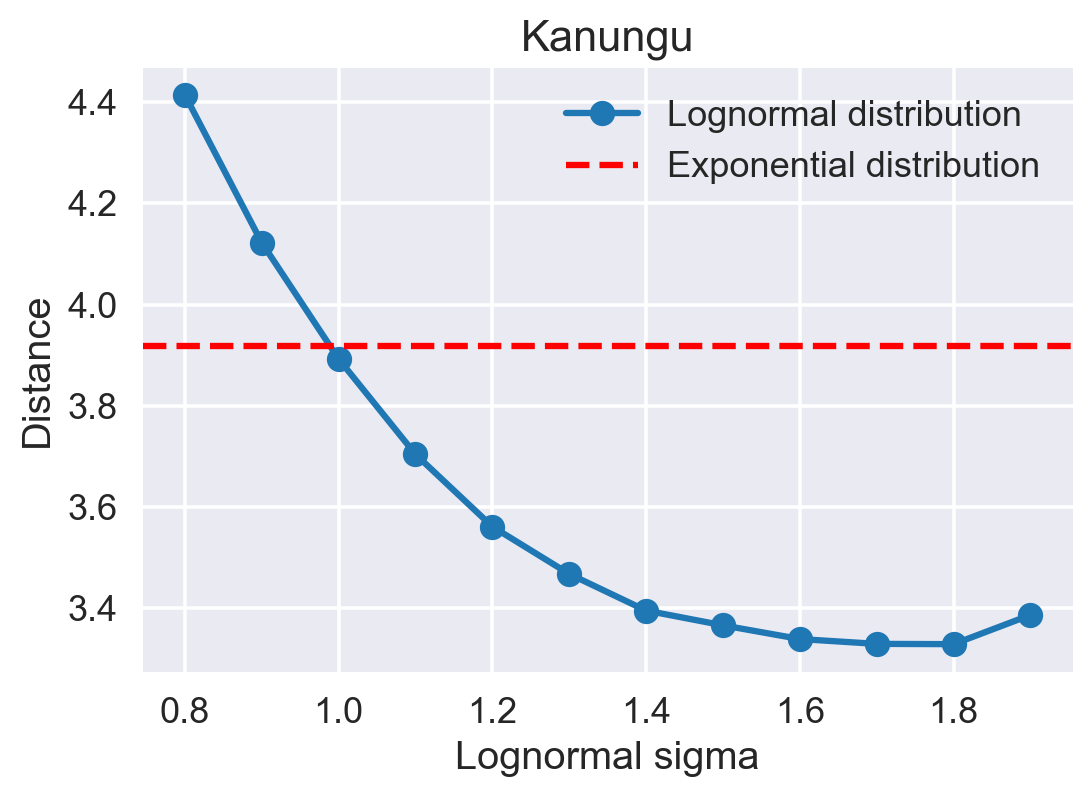

In [378]:
plt.figure(dpi=200)
plt.plot(sigma_to_test,k_arr, marker='o', label="Lognormal distribution")
plt.axhline(3.9183197841665933,linestyle='dashed',c="red",label="Exponential distribution")
plt.title("Kanungu")
plt.ylabel("Distance")
plt.xlabel("Lognormal sigma")
plt.legend()

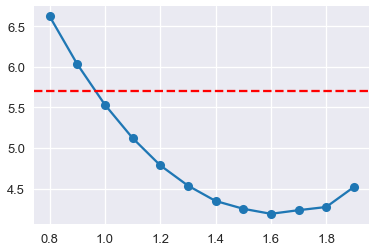

In [357]:
plt.plot(sigma_to_test,j_arr+k_arr, marker='o')
plt.axhline(1.7816130009697007+3.9183197841665933,linestyle='dashed',c="red")

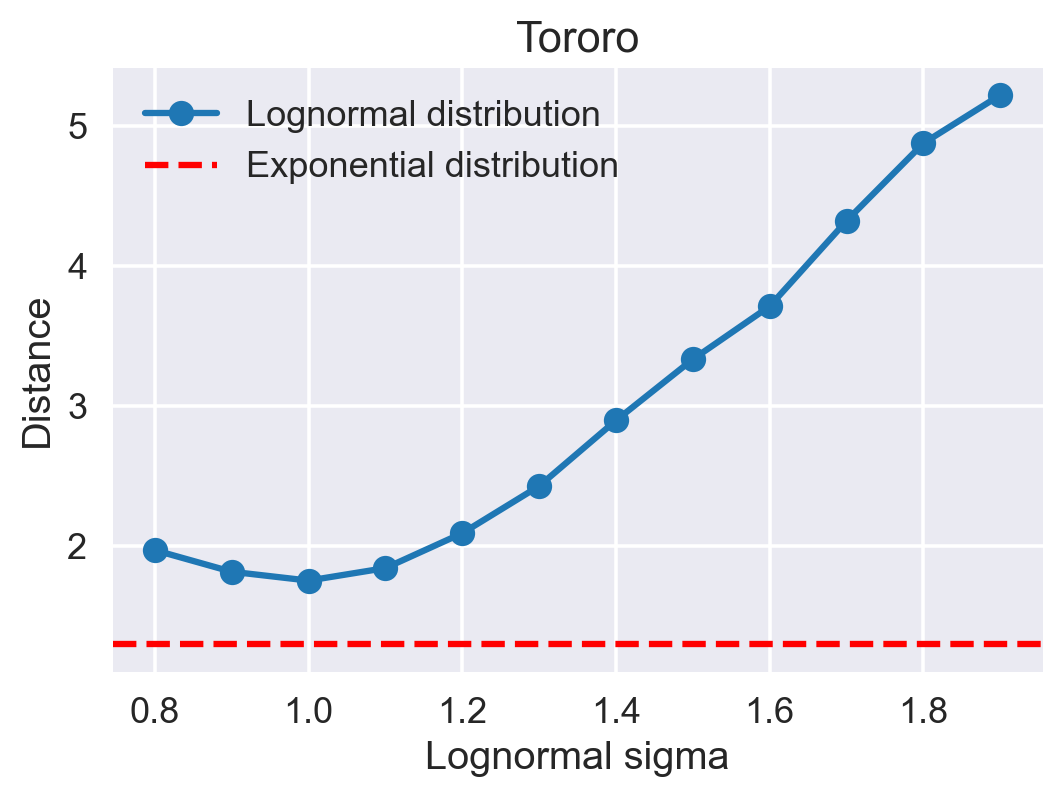

In [380]:
plt.figure(dpi=200)
plt.plot(sigma_to_test,t_arr, marker='o', label="Lognormal distribution")
plt.axhline(1.3019762460658975,linestyle='dashed',c="red",label="Exponential distribution")
plt.title("Tororo")
plt.ylabel("Distance")
plt.xlabel("Lognormal sigma")
plt.legend()

Text(0.5, 0, 'Log10(Household mosquito counts/month average)')

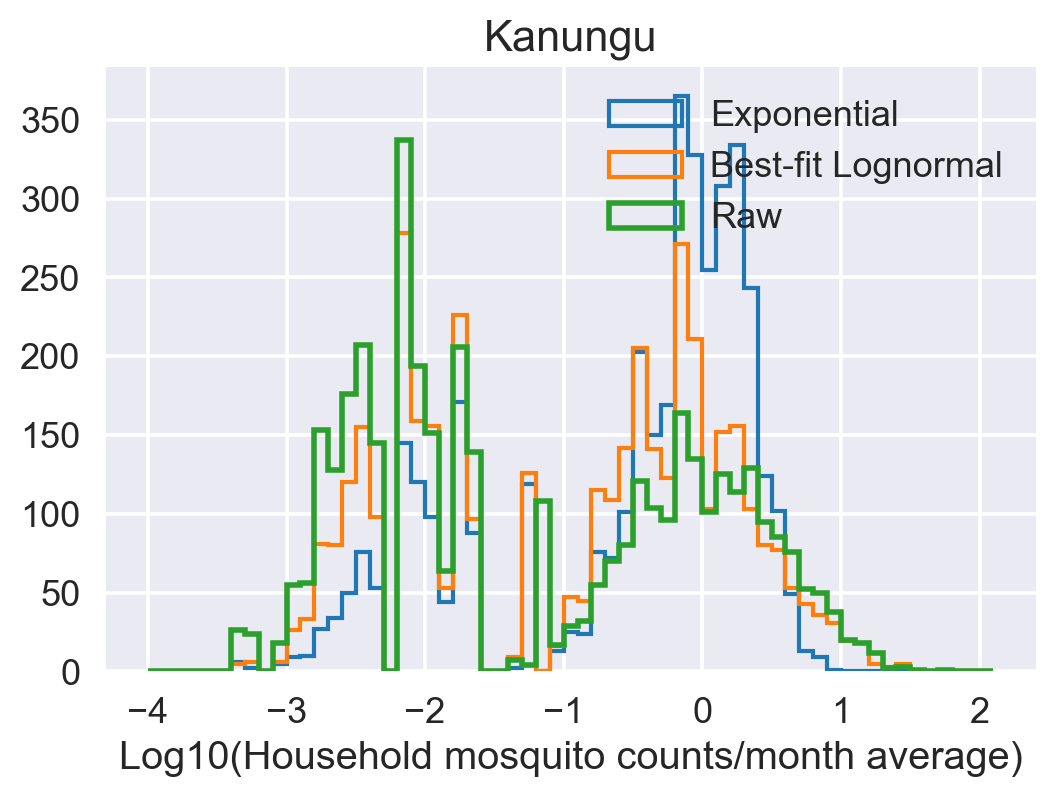

In [369]:
site="Kanungu"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2,sigma=1.6)
raw = site_df["totalanopheles_normalized_to_mean"]



plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-4,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential",lw=1.5)
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Best-fit Lognormal",lw=1.5)
plt.hist(np.log10(raw),bins=bins,histtype="step", label="Raw", lw=2)

# plt.yscale("log")
plt.legend()
plt.xlabel("Log10(Household mosquito counts/month average)")

Text(0.5, 0, 'Log10(Household mosquito counts/month average)')

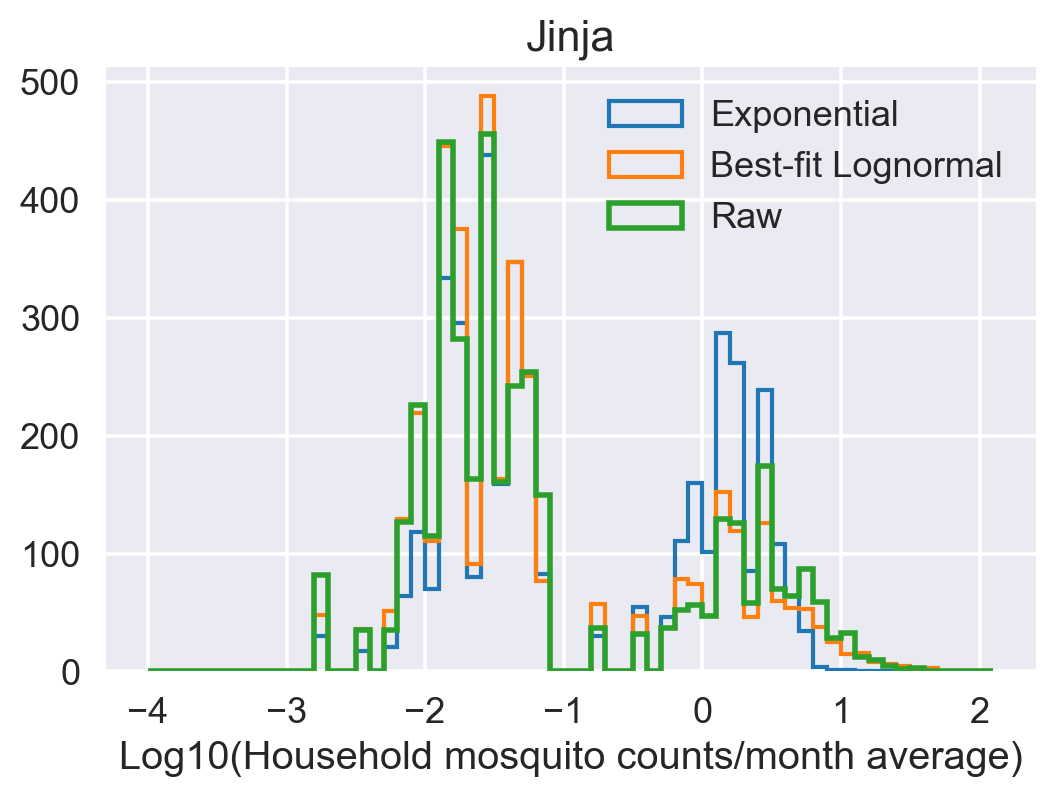

In [370]:
site="Jinja"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2,sigma=1.6)
raw = site_df["totalanopheles_normalized_to_mean"]



plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-4,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential",lw=1.5)
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Best-fit Lognormal",lw=1.5)
plt.hist(np.log10(raw),bins=bins,histtype="step", label="Raw", lw=2)

# plt.yscale("log")
plt.legend()
plt.xlabel("Log10(Household mosquito counts/month average)")

Text(0.5, 0, 'Log10(Household mosquito counts/month average)')

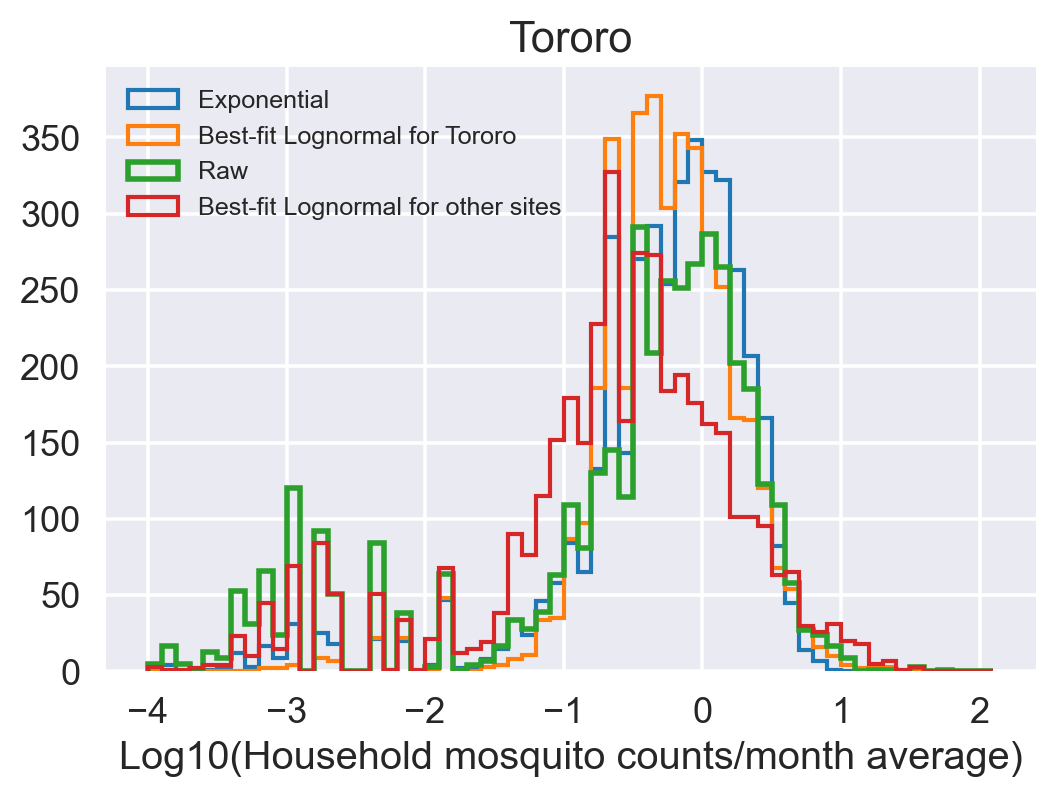

In [389]:
site="Tororo"
site_df = df_raw_with_mean_offset[df_raw_with_mean_offset["siteid"]==site]
foo = generate_model_counts_for_site(site_df,"exponential",normalized_by_month_mean=True,zero_offset=1e-2)
bar = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2,sigma=1.6)
hold = generate_model_counts_for_site(site_df,"lognormal",normalized_by_month_mean=True,zero_offset=1e-2,sigma=1.0)
raw = site_df["totalanopheles_normalized_to_mean"]



plt.figure(dpi=200)
plt.title(site)
# bins = np.linspace(-2,2,50)
bins = np.arange(-4,2.2,0.1)
plt.hist(np.log10(foo),bins=bins, histtype="step", label="Exponential",lw=1.5)
plt.hist(np.log10(hold),bins=bins, histtype="step", label="Best-fit Lognormal for Tororo",lw=1.5)
plt.hist(np.log10(raw),bins=bins,histtype="step", label="Raw", lw=2)
plt.hist(np.log10(bar),bins=bins, histtype="step", label="Best-fit Lognormal for other sites",lw=1.5)

# plt.yscale("log")
plt.legend(fontsize="xx-small",loc=2)
plt.xlabel("Log10(Household mosquito counts/month average)")

Text(0, 0.5, 'Frequency')

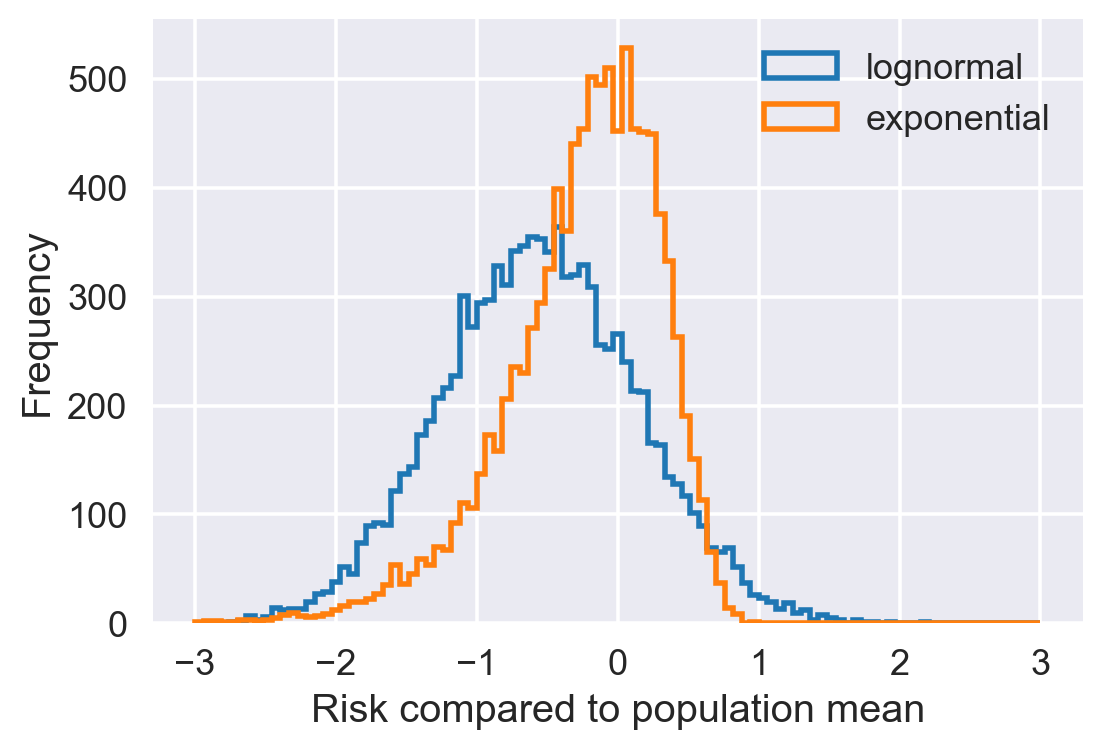

In [393]:
plt.figure(dpi=200)
x=return_lognormal(sigma=1.6)
plt.hist(np.log10(x), bins=np.linspace(-3,3,100), histtype="step", lw=2, label="lognormal")
# xx=return_lognormal(sigma=1.2)
# plt.hist(np.log10(xx), bins=np.linspace(-3,3,100), histtype="step", lw=2, label="lognormal2")
plt.hist(np.log10(z), bins=np.linspace(-3,3,100), histtype="step", lw=2, label="exponential")

# plt.axvline(np.mean(x), c="C0", linestyle='dashed')
# plt.axvline(np.mean(z), c="C1", linestyle='dashed')

plt.legend()

plt.xlabel("Risk compared to population mean")
plt.ylabel("Frequency")